# Importar librerias 

In [1647]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

# Importar cuadernos Jupyter previos 

In [1697]:
%run download_data_00.ipynb

La data Ocean buoys tiene un tamaño de: (736, 8)
La data Peatonas tiene un tamaño de: (37700, 9)
La data Factores de riesgo tiene un tamaño de: (245, 34)
La data Diabetes tiene un tamaño de: (768, 9)
Carga de datos exitosa


# Configurar aspecto de las graficas

In [1649]:
#para que los graficos sean abiertos directamente en el notebook y no en ventana emergente
%matplotlib inline 

#Estilo a las graficas con la biblioteca seaborn
sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

# Importar funciones personalizadas

In [1650]:
%run pandas-missing-extension.ipynb

/var/folders/52/bzfm61sj2znfqg12w34hpj6c0000gp/T/ipykernel_2853/3265467984.py:2: UserWarning: registration of accessor <class '__main__.MissingMethods'> under name 'missing' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class MissingMethods:


# Tabulación de datos faltantes

Al iniciar un análisis de datos, es útil comenzar con preguntas sencillas que conduzcan a números concretos:

- **¿Cuántos valores deberían existir en el conjunto de datos?**

Construir resúmenes por variables y observaciones:

- **¿Cuántos valores faltantes existen por cada variable?**
- **¿Cuántas variables tienen X número de valores faltantes?**
- **¿Cuántas observaciones tienen X número de valores faltantes?**
- **Cuenta los registros con datos faltantes**

Estas preguntas simples proporcionan una visión inicial del estado de tus datos y son fundamentales para planificar el siguiente paso en tu análisis.

In [1651]:
riskfactors_df.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104


In [1652]:
# Lista de columnas en el DataFrame
columns_translation = {
    'state': 'estado',
    'sex': 'género',
    'age': 'edad',
    'weight_lbs': 'peso_libras',
    'height_inch': 'altura_pulgadas',
    'bmi': 'índice_masa_corporal',
    'marital': 'estado_civil',
    'pregnant': 'embarazada',
    'children': 'número_de_hijos',
    'education': 'nivel_educativo',
    'employment': 'empleo',
    'income': 'ingreso',
    'veteran': 'veterano',
    'hispanic': 'hispano',
    'health_general': 'salud_general',
    'health_physical': 'salud_física',
    'health_mental': 'salud_mental',
    'health_poor': 'salud_mala',
    'health_cover': 'cobertura_médica',
    'provide_care': 'proporcionar_cuidado',
    'activity_limited': 'actividad_limitada',
    'drink_any': 'consume_alcohol',
    'drink_days': 'días_de_consumo_alcohol',
    'drink_average': 'promedio_consumo_alcohol',
    'smoke_100': 'fumador',
    'smoke_days': 'días_fumando',
    'smoke_stop': 'dejó_de_fumar',
    'smoke_last': 'último_día_fumado',
    'diet_fruit': 'dieta_frutas',
    'diet_salad': 'dieta_ensaladas',
    'diet_potato': 'dieta_papas',
    'diet_carrot': 'dieta_zanahorias',
    'diet_vegetable': 'dieta_vegetales',
    'diet_juice': 'dieta_jugos'
}

In [1653]:
# Verificación de valores nulos, nos entrega un data frame del mismo tamaño donde
# Existan valores nulos pondra True, de resto False
riskfactors_df.isna()


,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


## Resúmenes básicos de valores faltantes 🔁

In [1654]:
# Número total de valores completos (Sin observaciones faltantes)
print(f"La cantidad de datos en el data frame es: Filas = {riskfactors_df.shape[0]} -- Columnas = {riskfactors_df.shape[1]}")

La cantidad de datos en el data frame es: Filas = 245 -- Columnas = 34


In [1655]:
# el .number_complete es una funcion que creamos en otro notebook y trajimos a este notebook
# Nos da el valor total de datos del data Frame restando los datos faltantes
print("La cantidad de datos del data frame, restando los datos faltantes son de: ",riskfactors_df.missing.number_complete())

La cantidad de datos del data frame, restando los datos faltantes son de:  7144


In [1656]:
# el .number_missing es una funcion que creamos en otro notebook y trajimos a este notebook
# Nos da el valor total de datos faltantes en el data Frame
print("La cantidad de datos faltantes en el data frame es de: ",riskfactors_df.missing.number_missing())

La cantidad de datos faltantes en el data frame es de:  1186


# Resúmenes tabulares de valores faltantes 😶‍🌫️

## Variable / Columnas

### resumen por variable ⛳️

In [1657]:
# con la funcion missing_variable_summary() logramos ver por cada columna la cantidad de datos faltantes
# y nos muestra en orden de mayor a menor por porcentaje de datos faltantes respecto al total de los datos de la columna
print("Tabla: Cantidad de valores faltantes por columna")
riskfactors_df.missing.missing_variable_summary()


Tabla: Cantidad de valores faltantes por columna


,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Tabla: Cantidad de valores faltantes por columna</em></b>
    <ul>
        <li>Con la tabla anterior nos damos cuenta que existen columnas donde más del 50% de sus datos son datos faltantes.</li>
        <li>Tenemos una donde el 87% de sus datos son datos faltantes.</li>
        <li>Esto nos da una introducción a que el dataset cuenta con una cantidad considerable de datos faltantes.</li>
    </ul>
</div>

### Tabulación del resumen por variable

In [1658]:
# Con esta funcion agrupamos los datos faltantes por cantidad en que se repite su ausencia en cada columna
print("Tabla: Agrupación de valores faltantes por cantidad en que se repite su ausencia")
riskfactors_df.missing.missing_variable_table()

Tabla: Agrupación de valores faltantes por cantidad en que se repite su ausencia


,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Tabla: Agrupación de valores faltantes por cantidad en que se repite su ausencia</em></b>
    <ul>
        <li>La mayoría de las variables no tienen valores faltantes: Alrededor del 29.41% de las variables en el conjunto de datos no tienen valores faltante.</li>
        <li>Existen algunas variables con una cantidad significativa de valores faltantes: Un grupo considerable de variables tiene 8 valores faltantes cada una (aproximadamente el 17.65% del total de variables). Esto indica la presencia de un patrón común de falta de datos en estas variables específicas. </li>
        <li>Un pequeño número de variables tiene una cantidad considerable de valores faltantes: Algunas variables individuales tienen un número más alto de valores faltantes, como las variables con 113, 128, 134, 135, 161, 212, y 215 valores faltantes. Aunque son pocas en número, estas variables pueden requerir un tratamiento especial debido a la cantidad significativa de datos faltantes</li>
    </ul>
</div>

## casos / obserevaciones / Filas

### Resumen por caso

In [1659]:
# Esta función proporciona un resumen de los valores faltantes a nivel de caso en el DataFrame.
print("Tabla: Valores faltantes por cada fila del data frame")
riskfactors_df.missing.missing_case_summary()

Tabla: Valores faltantes por cada fila del data frame


,case,n_missing,pct_missing
90,90,15,41.666667
132,132,15,41.666667
3,3,12,33.333333
184,184,12,33.333333
48,48,12,33.333333
...,...,...,...
15,15,2,5.555556
215,215,1,2.777778
185,185,1,2.777778
199,199,1,2.777778


<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Tabla: Valores faltantes por cada fila del data frame</em></b>
    <ul>
        <li>La tabla se encuentra organizada de mayor a mnenor en la columna "pct_missing" y nos podemos dar cuenta que en algunas filas se presentas ausencia de datos en 15 columnas</li>
        <li>Se observa un patron de repetición de datos faltantes "n_missing" donde podriamos suponer un patron de los datos</li>
        <li>En na tabla a continuación agruparemos todos estos valores repetidos para tener una tabla mas resumida</li>
    </ul>
</div>

### Tabulación del resumen por caso

In [1660]:
# Esta función genera una tabla que resume la cantidad de valores faltantes por caso (fila).
print("Tabla: Resumen de valores faltantes por fila")
riskfactors_df.missing.missing_case_table()

Tabla: Resumen de valores faltantes por fila


,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Tabla: Resumen de valores faltantes por filas</em></b>
    <ul>
        <li>La tabla se encuentra organizada de mayor a mnenor en la columna "pct_missing" y nos podemos dar cuenta que en mas de 230 filas, la cantidad faltante es de 2 datos o mas </li>
        <li>Podemos ver que para el primer caso, los datos faltantes representan un 20% de los datos totales de las filas</li>
    </ul>
</div>

## intervalos de valores faltantes

In [1661]:
print("Tabla: Valores faltantes por columna")
riskfactors_df.missing.missing_columns()

Tabla: Valores faltantes por columna


,n_missing
diet_vegetable,96494
diet_fruit,76956
diet_juice,54000
diet_salad,41589
weight_lbs,40953
diet_potato,26468
diet_carrot,21690
height_inch,16122
bmi,6501.59
drink_days,1031


In [1662]:
# missing_variable_span() muestra el resumen de datos faltantes, datos completos,
# % de datos faltantes y % de datos completos por bloques de registros
print("Tabla: Datos de la columna Dieta Vegetariana, partido en fracciones de a 30 datos")
riskfactors_df.missing.missing_variable_span(
    variable ="diet_vegetable",
    span_every=30 # Rompemos nuestro bloque de datos, en 30 partes
)


Tabla: Datos de la columna Dieta Vegetariana, partido en fracciones de a 30 datos


,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,2,28,6.666667,93.333333
1,1,1,29,3.333333,96.666667
2,2,0,30,0.000000,100.000000
3,3,1,29,3.333333,96.666667
4,4,2,28,6.666667,93.333333
5,5,0,30,0.000000,100.000000
6,6,1,29,3.333333,96.666667
7,7,1,29,3.333333,96.666667
8,8,0,5,0.000000,100.000000


In [1663]:
# missing_variable_span() muestra el resumen de datos faltantes, datos completos,
# % de datos faltantes y % de datos completos por bloques de registros
print("Tabla: Datos de la columna peso en libras, partido en fracciones de a 30 datos")
riskfactors_df.missing.missing_variable_span(
    variable ="weight_lbs",
    span_every=30 # Rompemos nuestro bloque de datos, en 30 partes
)


Tabla: Datos de la columna peso en libras, partido en fracciones de a 30 datos


,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,29,3.333333,96.666667
1,1,0,30,0.000000,100.000000
2,2,3,27,10.000000,90.000000
3,3,2,28,6.666667,93.333333
4,4,1,29,3.333333,96.666667
5,5,0,30,0.000000,100.000000
6,6,2,28,6.666667,93.333333
7,7,1,29,3.333333,96.666667
8,8,0,5,0.000000,100.000000


In [1664]:

# missing_variable_span() muestra el resumen de datos faltantes, datos completos,
# % de datos faltantes y % de datos completos por bloques de registros
print("Tabla: Datos de la columna altura en in, partido en fracciones de a 30 datos")
riskfactors_df.missing.missing_variable_span(
    variable ="height_inch",
    span_every=30 # Rompemos nuestro bloque de datos, en 30 partes
)



Tabla: Datos de la columna altura en in, partido en fracciones de a 30 datos


,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,29,3.333333,96.666667
1,1,0,30,0.000000,100.000000
2,2,0,30,0.000000,100.000000
3,3,1,29,3.333333,96.666667
4,4,0,30,0.000000,100.000000
5,5,0,30,0.000000,100.000000
6,6,0,30,0.000000,100.000000
7,7,0,30,0.000000,100.000000
8,8,0,5,0.000000,100.000000


<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Tablas de la sección: Intervalos de valores faltantes</em></b>
    <ul>
        <li>Se dividen los datos por counter de a 30 datos, con la finalidad de ver si los datos faltantes se agrupan en algun counter especifico, y se hace con varias columnas donde existan valores faltantes, para saber si existe algún patron</li>
        <li>Al primer acercamiento, no nos damos cuenta que exista patron en los datos faltantes, en la tabla del al dieta vegetariana la mayor acomulación de datos faltantes se presentaba en el counter 0 y 4, mientras que en el peso en libras se presentaba en el counter 2, 3 y 6. Y para poder cmparar con otra columna como lo es la altura en in, nos damos cunenta que los datos faltantes se agrupan en el counter 0 y 3</li>
        <li>Es necesario ver los datos faltantes a tavés de graficas, para detectar algun tipo de patron o resultados, eso lo haremos más adelante</li>
    </ul>
</div>

### Run length de valores faltantes

In [1665]:
print("Tabla: Picos de valores faltantes en columna Dieta vegetariana")
riskfactors_df.missing.missing_variable_run(
    variable="diet_vegetable"
)

Tabla: Picos de valores faltantes en columna Dieta vegetariana


,run_length,is_na
0,3,complete
1,1,missing
2,5,complete
3,1,missing
4,38,complete
5,1,missing
6,41,complete
7,1,missing
8,41,complete
9,1,missing


In [1666]:
print("Tabla: Picos de valores faltantes en columna Peso en libras")
riskfactors_df.missing.missing_variable_run(
    variable="weight_lbs"
)

Tabla: Picos de valores faltantes en columna Peso en libras


,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


In [1667]:

print("Tabla: Picos de valores faltantes en columnaaltura en in")
riskfactors_df.missing.missing_variable_run(
    variable="height_inch"
)

Tabla: Picos de valores faltantes en columnaaltura en in


,run_length,is_na
0,13,complete
1,1,missing
2,77,complete
3,1,missing
4,153,complete


<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Tablas de la sección: Run leght</em></b>
    <ul>
        <li>La finalidad de esto es ver con que periosidad se presentan los datos faltantes en cada uno, observamos que los datos faltantes no se acomulan en filas continuas</li>
    </ul>
</div>

# Visualización inicial de valores faltantes 👀

## Variable ⛳️

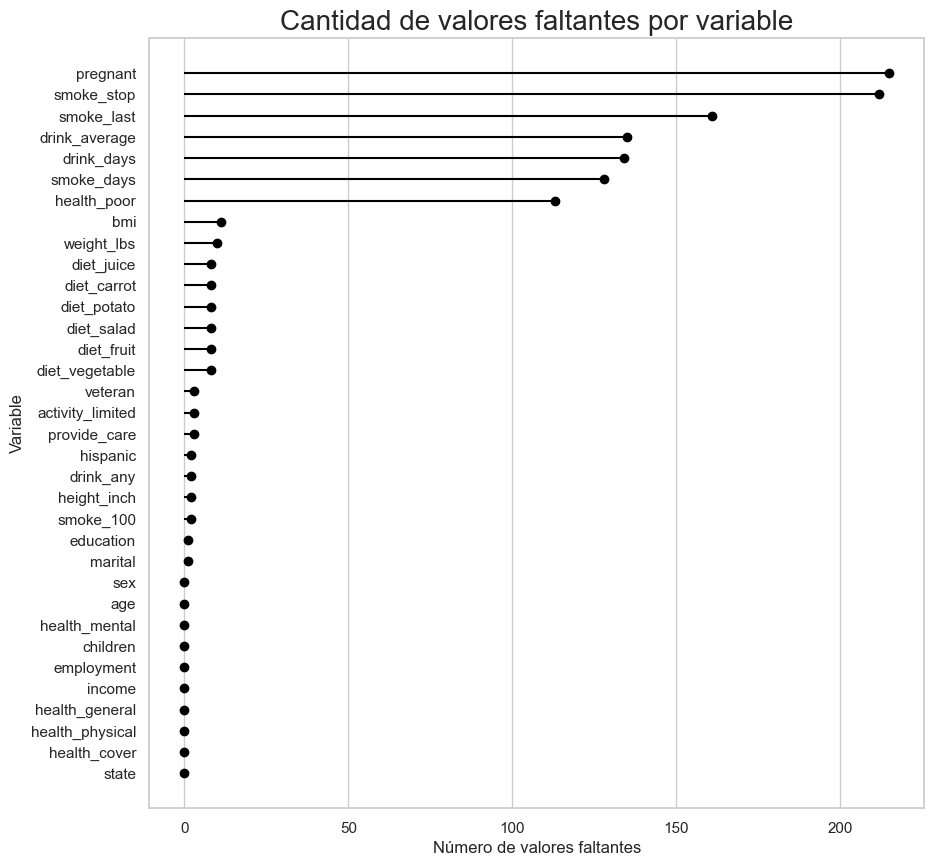

In [1668]:
riskfactors_df.missing.missing_variable_plot()
plt.title("Cantidad de valores faltantes por variable", fontsize=20);

In [1669]:
# genera duda porque algunas variables falta tantos valores, una sospecha es que son categoricas, de Si o No
riskfactors_df.select_dtypes(include="category").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   marital           244 non-null    category
 3   pregnant          30 non-null     category
 4   education         244 non-null    category
 5   employment        245 non-null    category
 6   income            245 non-null    category
 7   veteran           242 non-null    category
 8   hispanic          243 non-null    category
 9   health_general    245 non-null    category
 10  health_cover      245 non-null    category
 11  provide_care      242 non-null    category
 12  activity_limited  242 non-null    category
 13  drink_any         243 non-null    category
 14  smoke_100         243 non-null    category
 15  smoke_days        117 non-null    category
 16  smoke_stop        33 non-n

<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Gráfica: Cantidad de valores faltantes por variable</em></b>
    <ul>
        <li>Esta es una forma visual de poder ver la variable que mas datos faltantes tienen</li>
        <li>Haciendo una investigación en el tipo de variables de data frame, njos damos cuenta que en la gráfica, las que mas valores faltantes tiene son categoricas</li>
    </ul>
</div>

## Casos / Observación / Filas

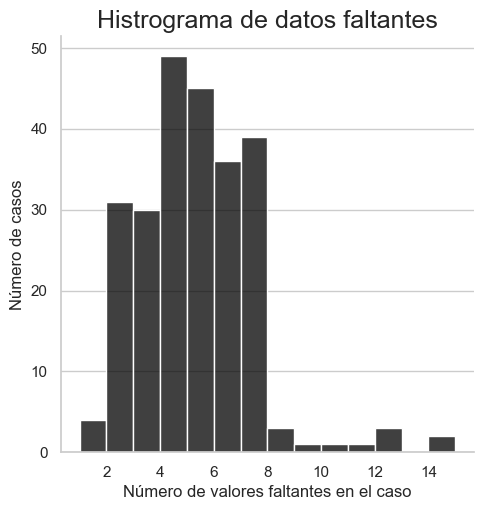

In [1670]:
# Muestra los valores faltantes en cada fila en forma de histograma
riskfactors_df.missing.missing_case_plot()
plt.title("Histrograma de datos faltantes", fontsize=18);

<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Gráfica: Histrograma de datos faltantes</em></b>
    <ul>
        <li>Este histograma nos muestra cuantas variables hacen falta para cada observación</li>
        <li>Podemos ver que la gran mayoria de filas tiene un promedio de 5 datos faltantes, continuando con 7 datos faltantes</li>
    </ul>
</div>

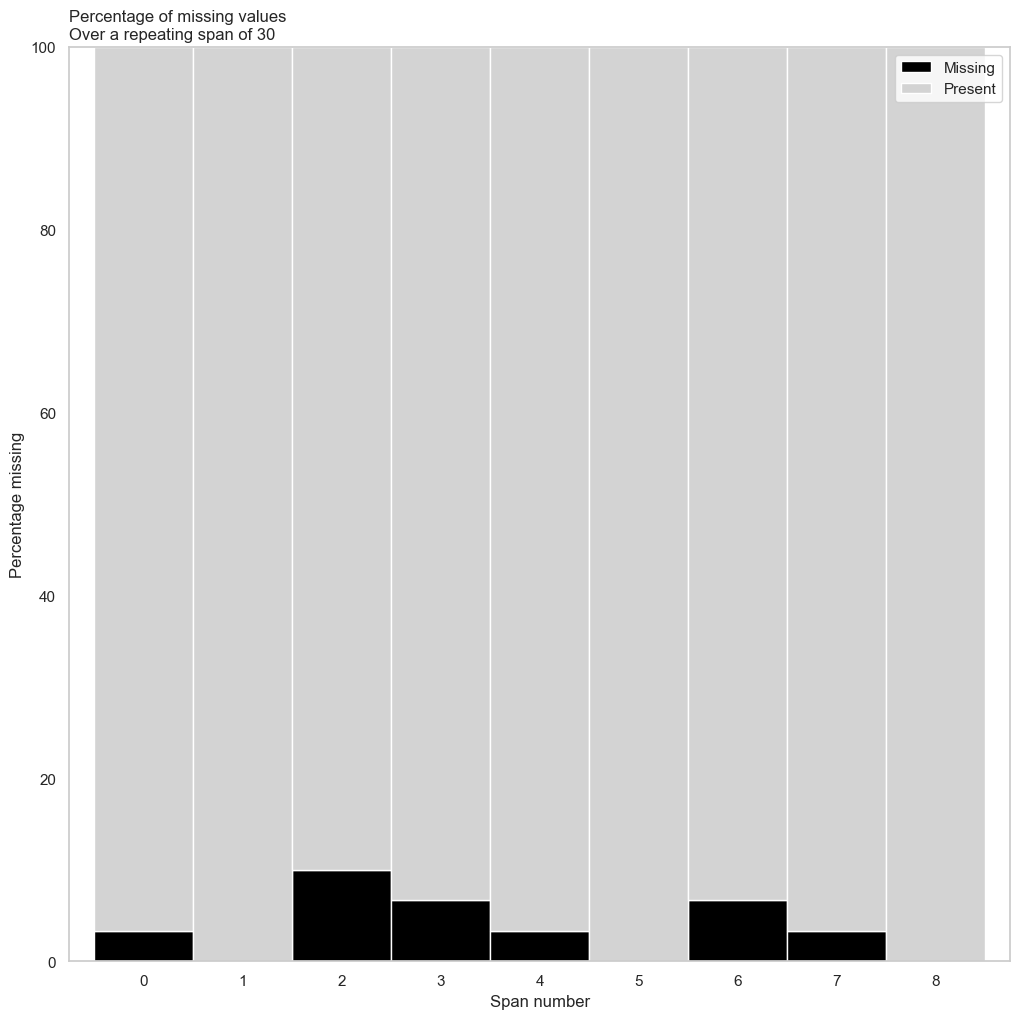

In [1671]:
# Podemos de nuevo romper los datos por couters para verlo ahora de manera frafica
riskfactors_df.missing.missing_variable_span_plot(
    variable="weight_lbs",
    span_every=30,
    rot = 0
)


<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Gráfica: Percentage of missing values</em></b>
    <ul>
        <li>Este gráfico nos muestra de forma visual, el ejercicio que se hizo anteriormente, donde rompiamos los datos en 30 partes iguales para ver si los datos faltantes se acomulaban en algun punto especifico</li>
        <li>Podemos ver que los datos no presentan ningun praton particular, se tienden acomular mas que todo en los casos 2, 3 y 4.</li>
    </ul>
</div>

## Biblioteca Missingno

La biblioteca **Missingno** es una herramienta poderosa en el ámbito de la ciencia de datos diseñada para abordar y visualizar valores faltantes en conjuntos de datos. Su objetivo principal es facilitar la identificación de patrones y relaciones en los datos donde la información podría estar ausente.

### Características Principales

- **Matriz de Nulos:** Visualiza la ubicación de los valores faltantes en un DataFrame utilizando colores para resaltar patrones.
  
- **Barra de Nulos:** Muestra la cantidad de valores faltantes en cada columna mediante barras verticales.

- **Mapa de Calor:** Ofrece una representación más detallada de la distribución de valores nulos en el conjunto de datos.

- **Dendrograma de Nulos:** Explora la relación de nulos entre filas y columnas, revelando posibles agrupamientos.

### Ventajas

- **Exploración Eficiente:** Permite una rápida exploración visual de la distribución de valores faltantes.
  
- **Identificación de Patrones:** Facilita la identificación de patrones sistemáticos o aleatorios en la falta de datos.

- **Mejora del Preprocesamiento:** Ayuda en la fase de preprocesamiento al visualizar áreas críticas que pueden requerir imputación de datos.




Los valores faltantes son repesentados por el blanco, y los datos existentes por el gris 
 Grafica: Valores faltantes por columna


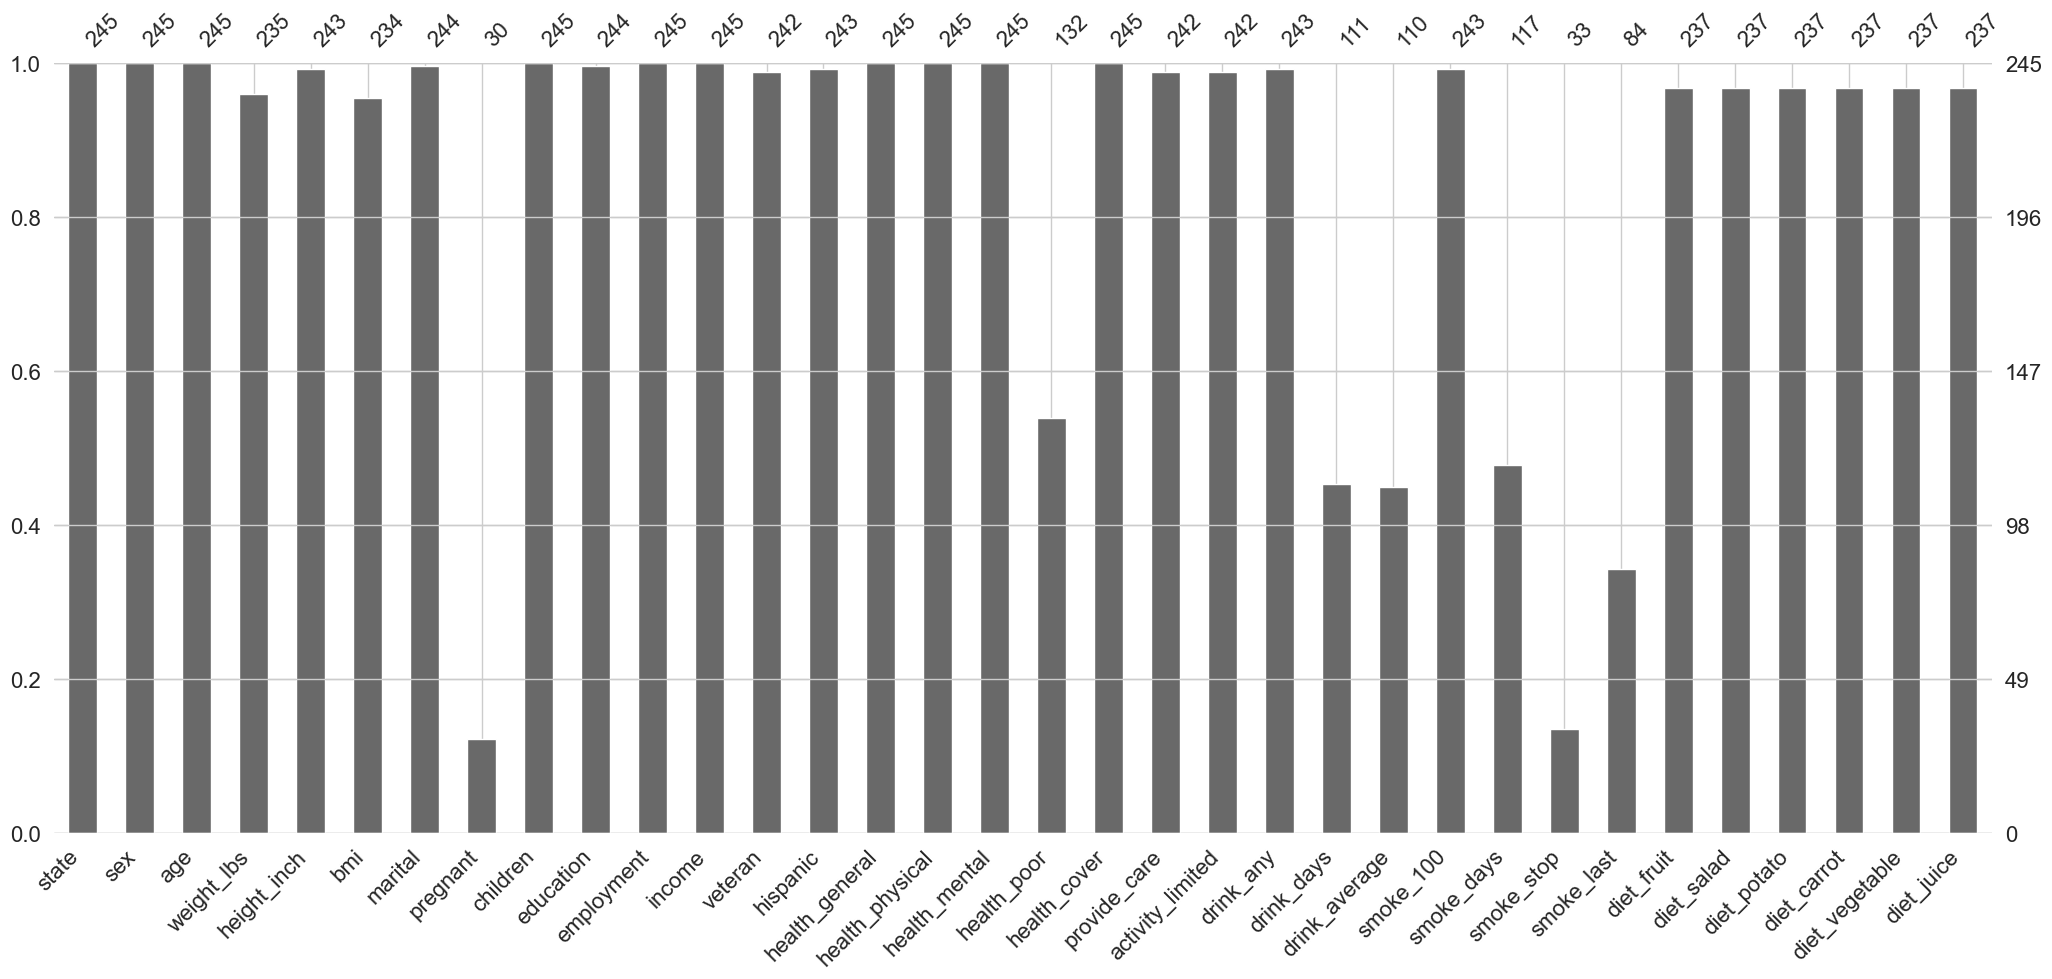

In [1672]:
# Hacemos uso de la libreria missingno.bar para poder ver faltantes en cada columna, a través de grafico de barras
print("Los valores faltantes son repesentados por el blanco, y los datos existentes por el gris \n Grafica: Valores faltantes por columna")
missingno.bar(df = riskfactors_df);

<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Gráfica: Valores faltantes por columna</em></b>
    <ul>
        <li>Usamos la libreria missigno que ya viene incorporado con graficos excelentes</li>
        <li>Podemos darnos cuenta más facil, que en columnas como "pregnant" los datos faltantes son demasiados, así como "smoke_stop". Algo que ya habíamos intuido anteriormente con otra gráfica, pero no con valores tan exactos como este</li>
    </ul>
</div>

Grafico: Matriz de valores faltantes


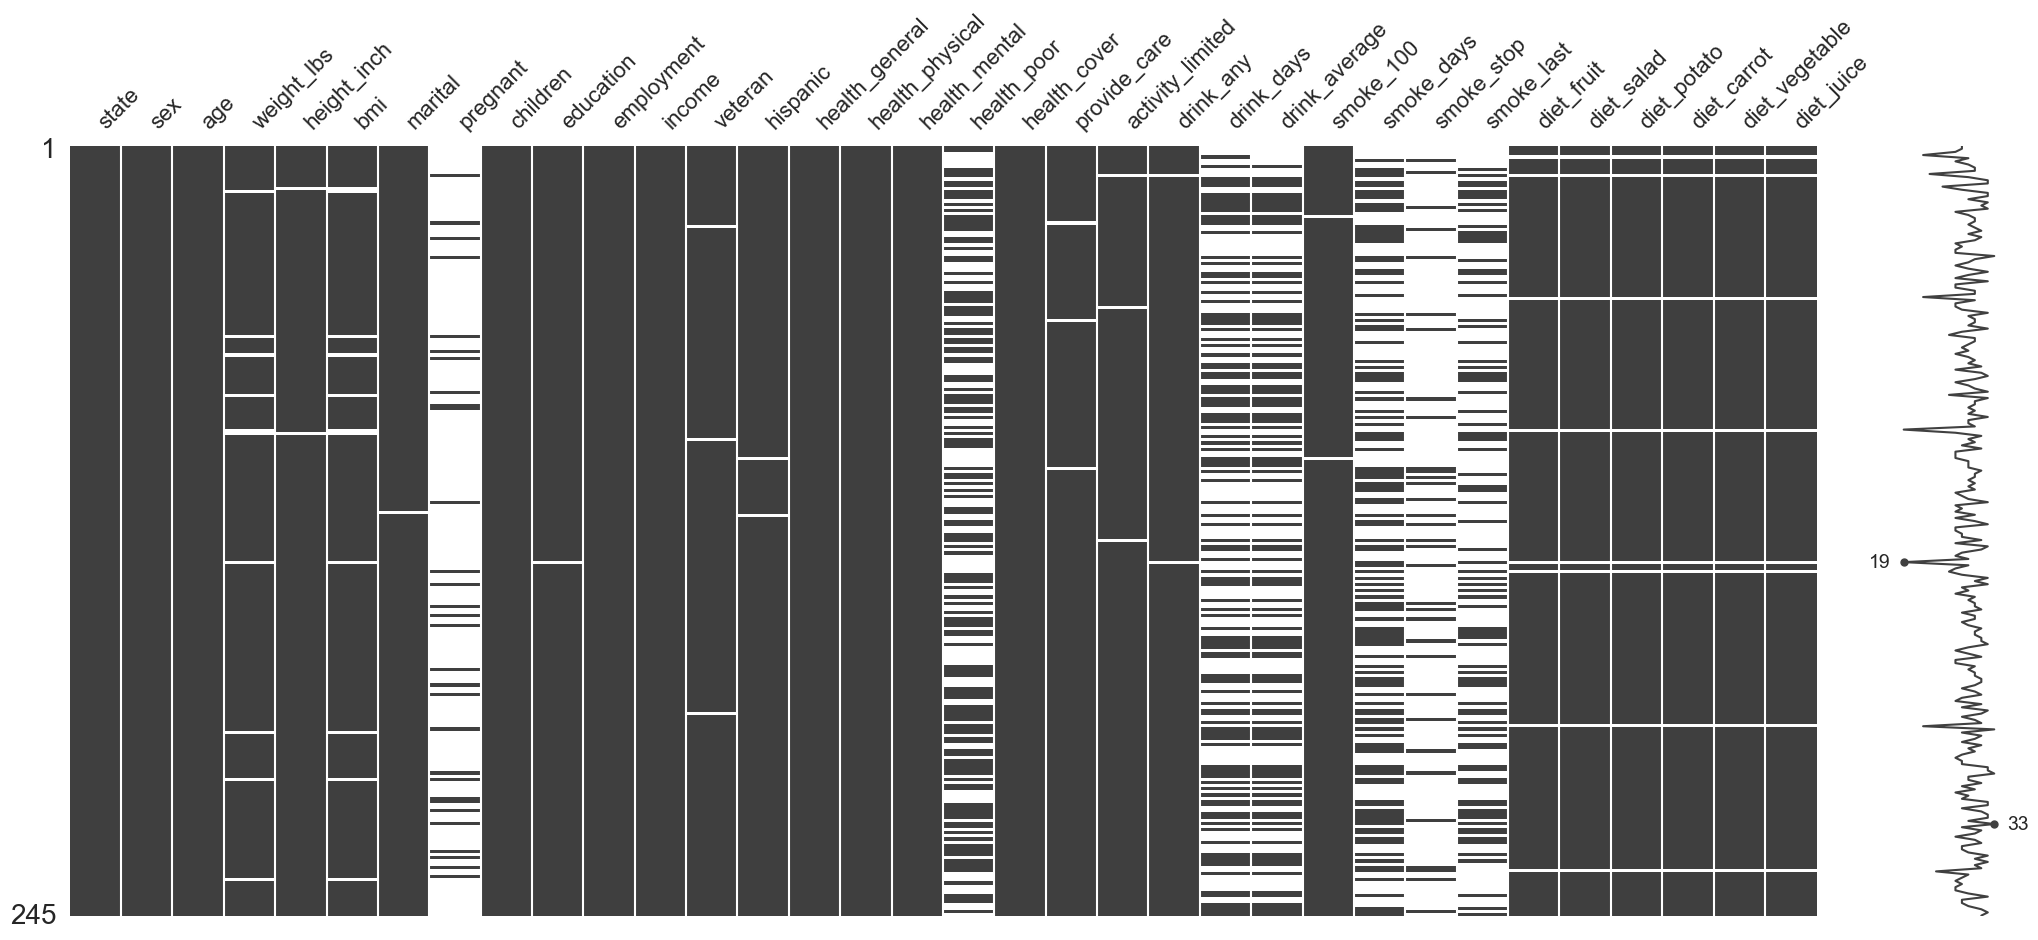

In [1673]:
print("Grafico: Matriz de valores faltantes")
missingno.matrix(df=riskfactors_df);

<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Gráfica: Matriz de valores faltantes</em></b>
    <ul>
        <li>Usamos la libreria missigno que ya viene incorporado con graficos excelentes</li>
        <li>Podemos ver de nuevo en blanco los valores faltantes, pero ademas, en la parte derecha del grafico un grafico adicional que nos muestra unos ciertos picos, esto indica que en esos puntos existes demasiados datos faltantes</li>
        <li>Esto ya nos puede mostrar un patron de datos faltantes en algunas filas de nuestro data frame</li>
    </ul>
</div>

/Users/Sebastian/Desktop/Cursos Platzi/Datos faltantes/env_data/lib/python3.9/site-packages/upsetplot/plotting.py:783: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['#0000002e' 'black' '#0000002e' '#0000002e' '#0000002e' 'black' 'black'
 'black' '#0000002e' 'black' '#0000002e' 'black' '#0000002e' 'black'
 'black' 'black' 'black' 'black']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  styles["edgecolor"].fillna(styles["facecolor"], inplace=True)
/Users/Sebastian/Desktop/Cursos Platzi/Datos faltantes/env_data/lib/python3.9/site-packages/upsetplot/plotting.py:784: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'solid' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  styles["linestyle"].fillna("solid", inplace=True)


Text(0.5, 1.0, 'Apariciones conjuntas de variables')

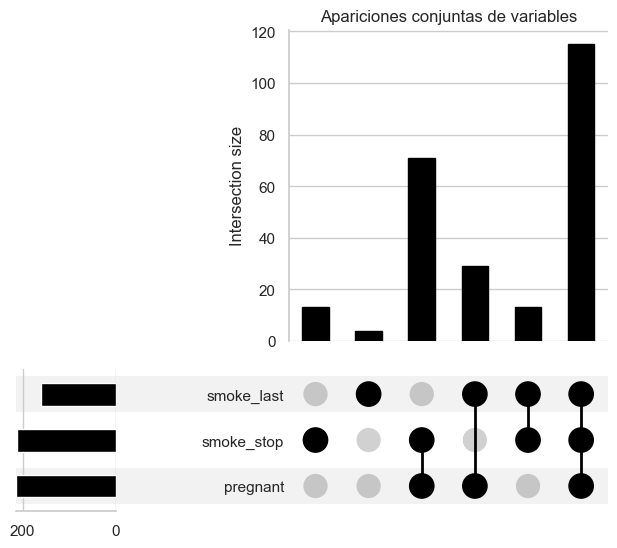

In [1674]:
riskfactors_df.missing.missing_upsetplot(
    variables= ["pregnant", "smoke_last", "smoke_stop"], # None -> para tomar todas las variables
    element_size= 50
)
plt.title("Apariciones conjuntas de variables")

<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Gráfica: Apariciones conjuntas de variables</em></b>
    <ul>
        <li>Esta es una forma visual de interpretar la relación de dos o mas variables, y si estas comparten datos faltantes</li>
        <li>Nos damos cuenta que estos tres columnas que tomamos [smoke_last , smoke_stop, pregnant] comparten filas de datos faltates, casi las 120 datos faltantes</li>
    </ul>
</div>

# Tipos de valores faltantes

Tipos de Valores Faltantes
Tenemos tres tipos de mecanismo de valores faltantes:

- Missing Completely at Random (Perdidos completamente al azar)
- Missing at Random (Perdidos al azar)
- Missing not at Random (Perdidos no al azar)
1. Missing Completely at Random (MCAR)
Son datos ocasionados por herramientas que dejan de funcionar sin ninguna razon detras. La localizacion de los valores faltantes ocurre completamente al azar, esto no depende de ningun otro dato

2. Missing at Random (MAR)
Las herramientas necesitan mantenimiento periodico para asegurar su funcionamiento constante. En las fechas donde se le hace mantenimiento sabemos que ocurrira una falta de datos por lo que esos datos faltantes son localizados. La localizacion de los valores faltantes en el conjunto de datos depende de otros valores observados

3. Missing not at Random (MNAR)
Las herramientas tienen limites. Al tratar de hacer seguimientos fuera de su rango de medicion, se generan valores faltantes. La localizacion de los valores faltantes en el conjunto de datos dependen de los valores faltantes en si mismos

Puedo tener seguridad sobre que mecanismo de valores faltantes es correcto para mis datos?

No, no podemos tener seuridad sobre cual mecanismo incidio sobre los datos, pero a traves de analisis y conocimiento del tema puedes hacer suposiciones razonables

<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">ℹ️ Información</b>
    <ul>
        <li>Para el ejercicio de datos faltantes usaremos la data de <b>diabetes_df</b></li>
        <li>Esta no ha sido manipulada y encontraremos datos donde en vez de NaN existen 0</li>
    </ul>
</div>

In [1675]:
diabetes_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Vamos a analisar:** Las columnas donde un cero puede ser un dato nulo, y donde no

### Las columas son las sigueintes

- **pregnancies:** Número de veces que la paciente ha estado embarazada.
- **glucose:** Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
- **blood_pressure:** Presión arterial diastólica (mm Hg).
- **skin_thickness:** Grosor del pliegue cutáneo del tríceps (mm).
- **insulin:** Nivel de insulina en suero a 2 horas (mu U/ml).
- **bmi:** Índice de masa corporal (BMI), que es una medida del peso en relación con la altura.
- **diabetes_pedigree_function:** Función de pedigrí de diabetes, una medida de la predisposición genética a la diabetes basada en la historia familiar.
- **age:** Edad de la paciente.
- **outcome:** Variable de resultado que indica si la paciente tiene diabetes (1) o no (0).


Con lo anterior, podemos conclir que las columnas que si pueden tener un cero (0) como dato en sus columnas son

- **pregnancies**
- **outcome**

De resto son columnas que si tienen cero (0) hace referencia a un dato faltanta NaN


In [1676]:
# Hacemos un par de comprobacions si existen ceros en las columnas
for column in diabetes_df.columns:
    if column not in ("pregnancies", "outcome"):
        print(f"En la columna {column} existen {diabetes_df[diabetes_df[column]==0][column].value_counts().get(0, 0)} ceros (0)")


En la columna glucose existen 5 ceros (0)
En la columna blood_pressure existen 35 ceros (0)
En la columna skin_thickness existen 227 ceros (0)
En la columna insulin existen 374 ceros (0)
En la columna bmi existen 11 ceros (0)
En la columna diabetes_pedigree_function existen 0 ceros (0)
En la columna age existen 0 ceros (0)


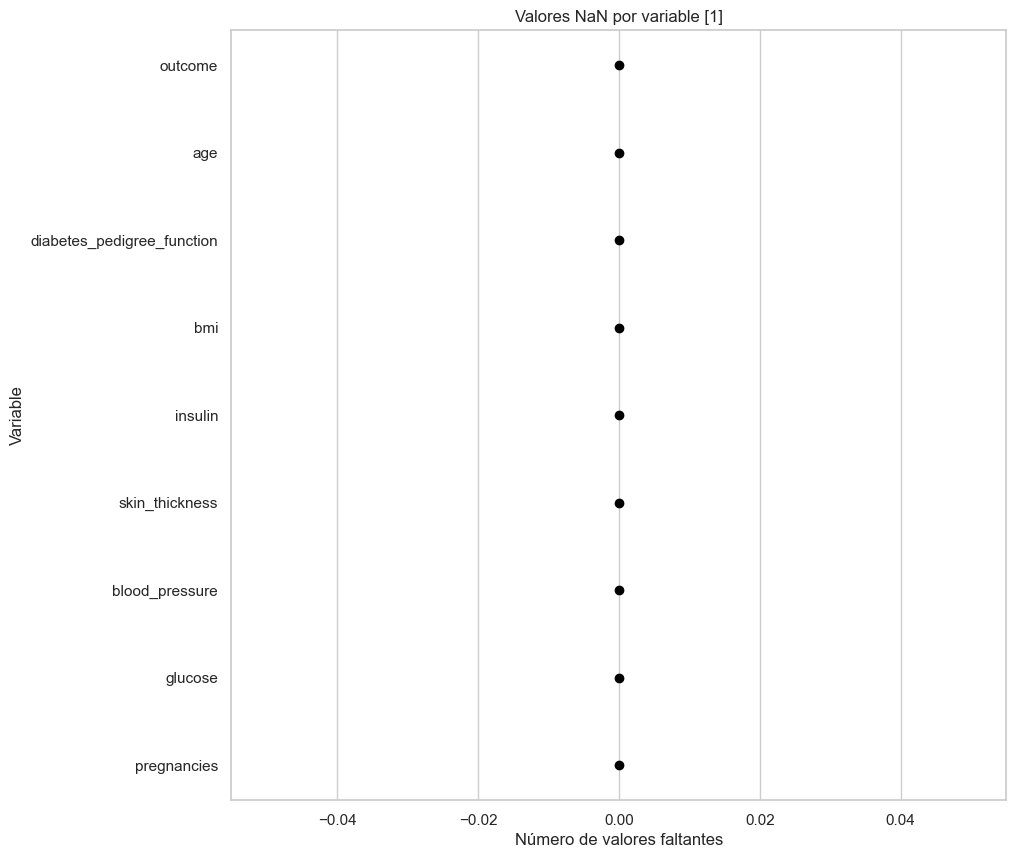

In [1700]:
diabetes_df.missing.missing_variable_plot()
plt.title("Valores NaN por variable [1]");

In [1702]:
# sabemos que los datos faltantes estan de las columnas de la 1 a la 6 (de la columna glucose a la bmi, ya que las otras no tienen ceros)
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0,np.nan)

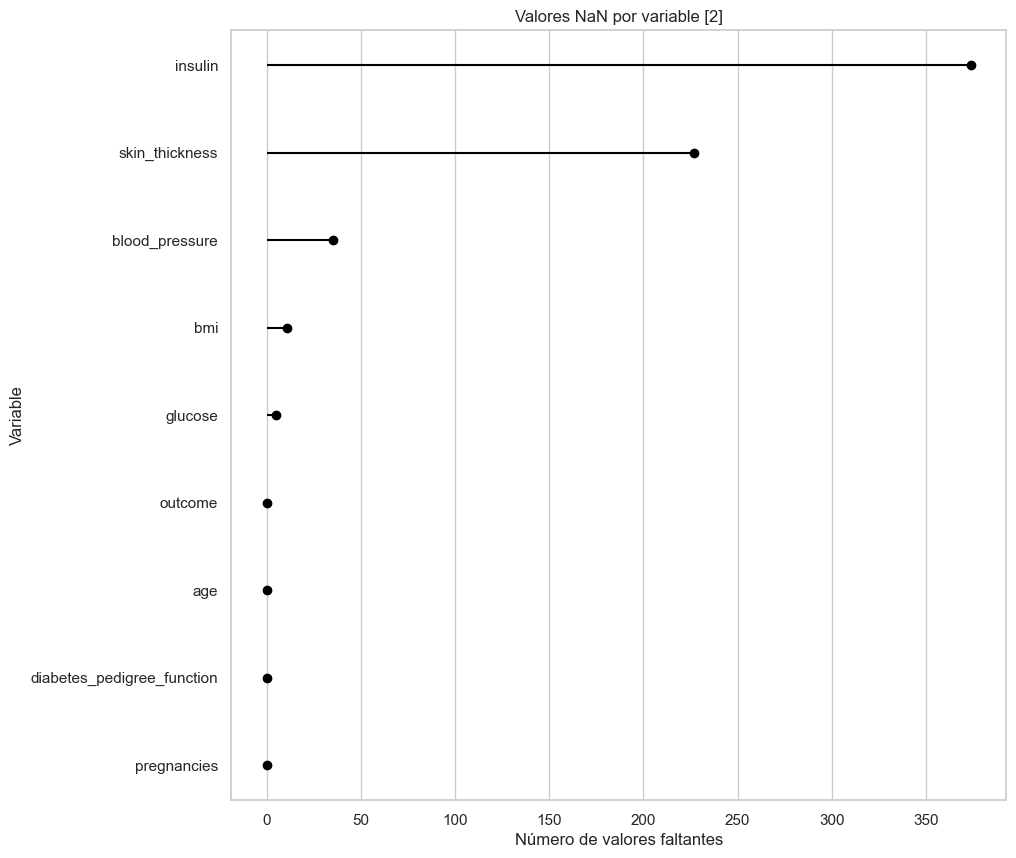

In [1703]:
diabetes_df.missing.missing_variable_plot()
plt.title("Valores NaN por variable [2]");


<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Gráfica: Valores NaN por variable [1] y [2]</em></b>
    <ul>
        <li>Con estas graficas nos podemos dar cuanta la cantidad de valores faltantes que estaban escritos con ceros (0)</li>
        <li>Ahora ya tenemos los datos como NaN en nuestro data frame, esto nos permite hacer todos los ejercicios anteriores que hemos realizado y los que continuan</li>
    </ul>
</div>

## Missing Completamente al Azar (MCAR)

**Missing Completamente al Azar (MCAR)** es un tipo de patrón de datos faltantes en el que la probabilidad de que falte un valor en una variable particular no está relacionada con los valores observados o no observados de esa variable ni con los valores observados en otras variables. En otras palabras, la probabilidad de que falte un valor es completamente aleatoria y no está influenciada por ninguna información observada o no observada en el conjunto de datos.

En un escenario MCAR, la falta de valores es independiente de cualquier característica específica del conjunto de datos, ya sea observable o no observable. Esto significa que no hay un patrón sistemático en los valores faltantes y no hay ninguna relación estructurada entre los datos faltantes y los datos observados.

Por ejemplo, si estamos recopilando datos sobre la altura y algunas personas olvidan proporcionar su altura, y si la probabilidad de que falte este dato no está relacionada con la propia altura o cualquier otra característica de esas personas, entonces estamos en presencia de un patrón MCAR.

En términos más simples, en un patrón MCAR, la falta de datos es completamente aleatoria y no está influenciada por ninguna otra información en el conjunto de datos. Este supuesto es importante cuando se manejan datos faltantes en análisis estadísticos y métodos de imputación, ya que puede afectar las inferencias y conclusiones derivadas del análisis.


Text(0.5, 1.0, 'Matirz de sombra de datos faltantes')

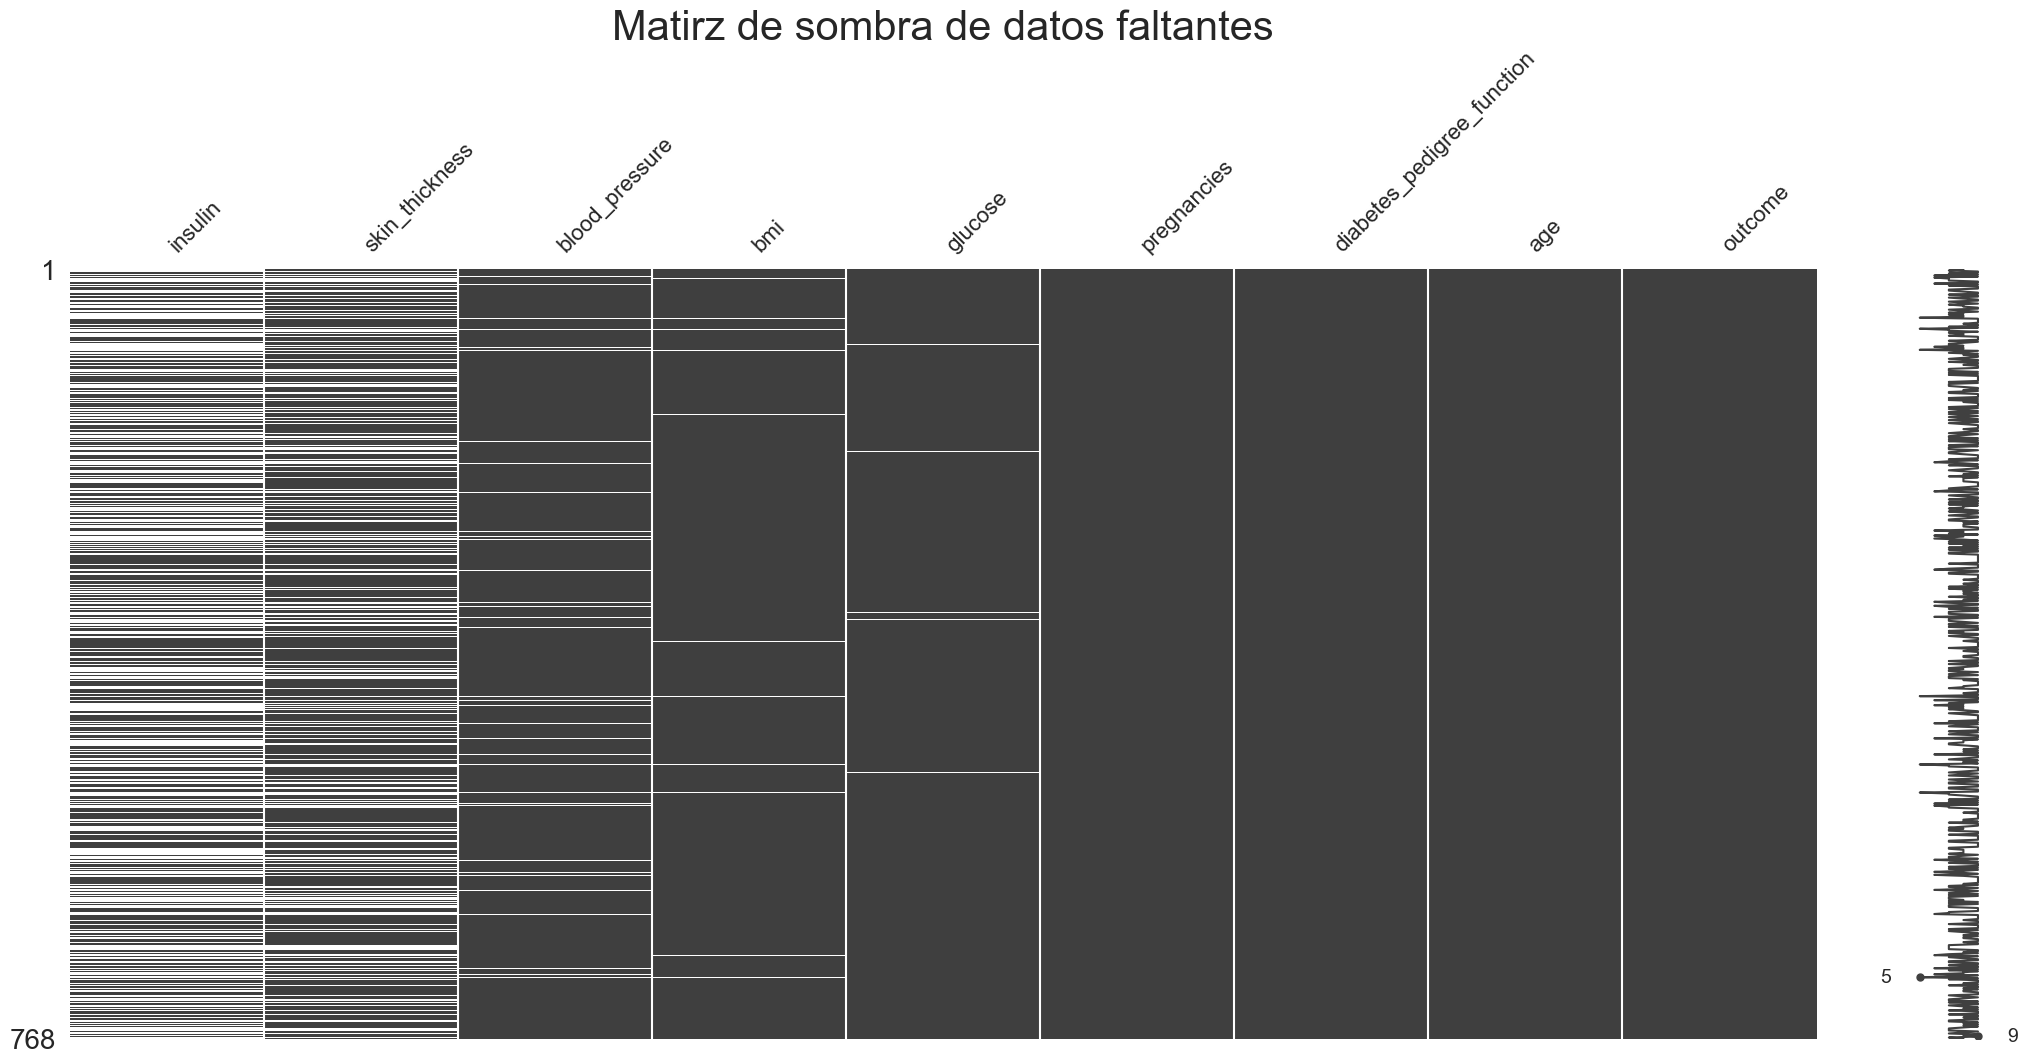

In [1707]:
# ordena las columnas desde la que mas tiene valores faltantes a la que menos tiene
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix) # muestra los datos en una matriz de sombra
)
plt.title("Matirz de sombra de datos faltantes", fontsize=30)

<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Gráfica: Matriz de sombra de datos faltantes</em></b>
    <ul>
        <li>Podemos ver gracias a la biblioteca de missigno, una matriz de datos faltantes, con esto es facil ver donde tenemos mas y menos datos faltantes</li>
        <li>Para las variables bmi y glucose hay tan pocos valores faltantes que se pueden considerar valores faltantes al azar debido que no presentan filas con valores faltantes iguales (no se encuentran dos lineas blancas seguidas)</li>
    </ul>
</div>

## Missing en Forma Aleatoria (MAR)

**Missing en Forma Aleatoria (MAR)** es un tipo de patrón de datos faltantes en el que la probabilidad de que falte un valor en una variable particular puede depender de los valores observados en otras variables, pero no de los valores no observados. En otras palabras, la probabilidad de que falte un valor no está relacionada con la ausencia de información no observada en el conjunto de datos.

En un escenario MAR, aunque existe una relación entre la probabilidad de datos faltantes y las variables observadas, no hay ninguna relación sistemática con las variables no observadas. Esto significa que, aunque la probabilidad de datos faltantes puede depender de las características observadas, no hay un patrón predecible en la falta de valores en las variables no observadas.

Por ejemplo, si estamos recopilando datos sobre ingresos y la probabilidad de que falten datos en la variable "ingresos" depende del nivel de educación observado, pero no de la información no observada, estamos en un escenario MAR.

En términos generales, en un patrón MAR, la falta de datos puede depender de variables observadas, pero no hay una relación estructurada con las variables no observadas. Este tipo de patrón es fundamental al abordar el manejo de datos faltantes y puede tener implicaciones en el análisis estadístico y los métodos de imputación.


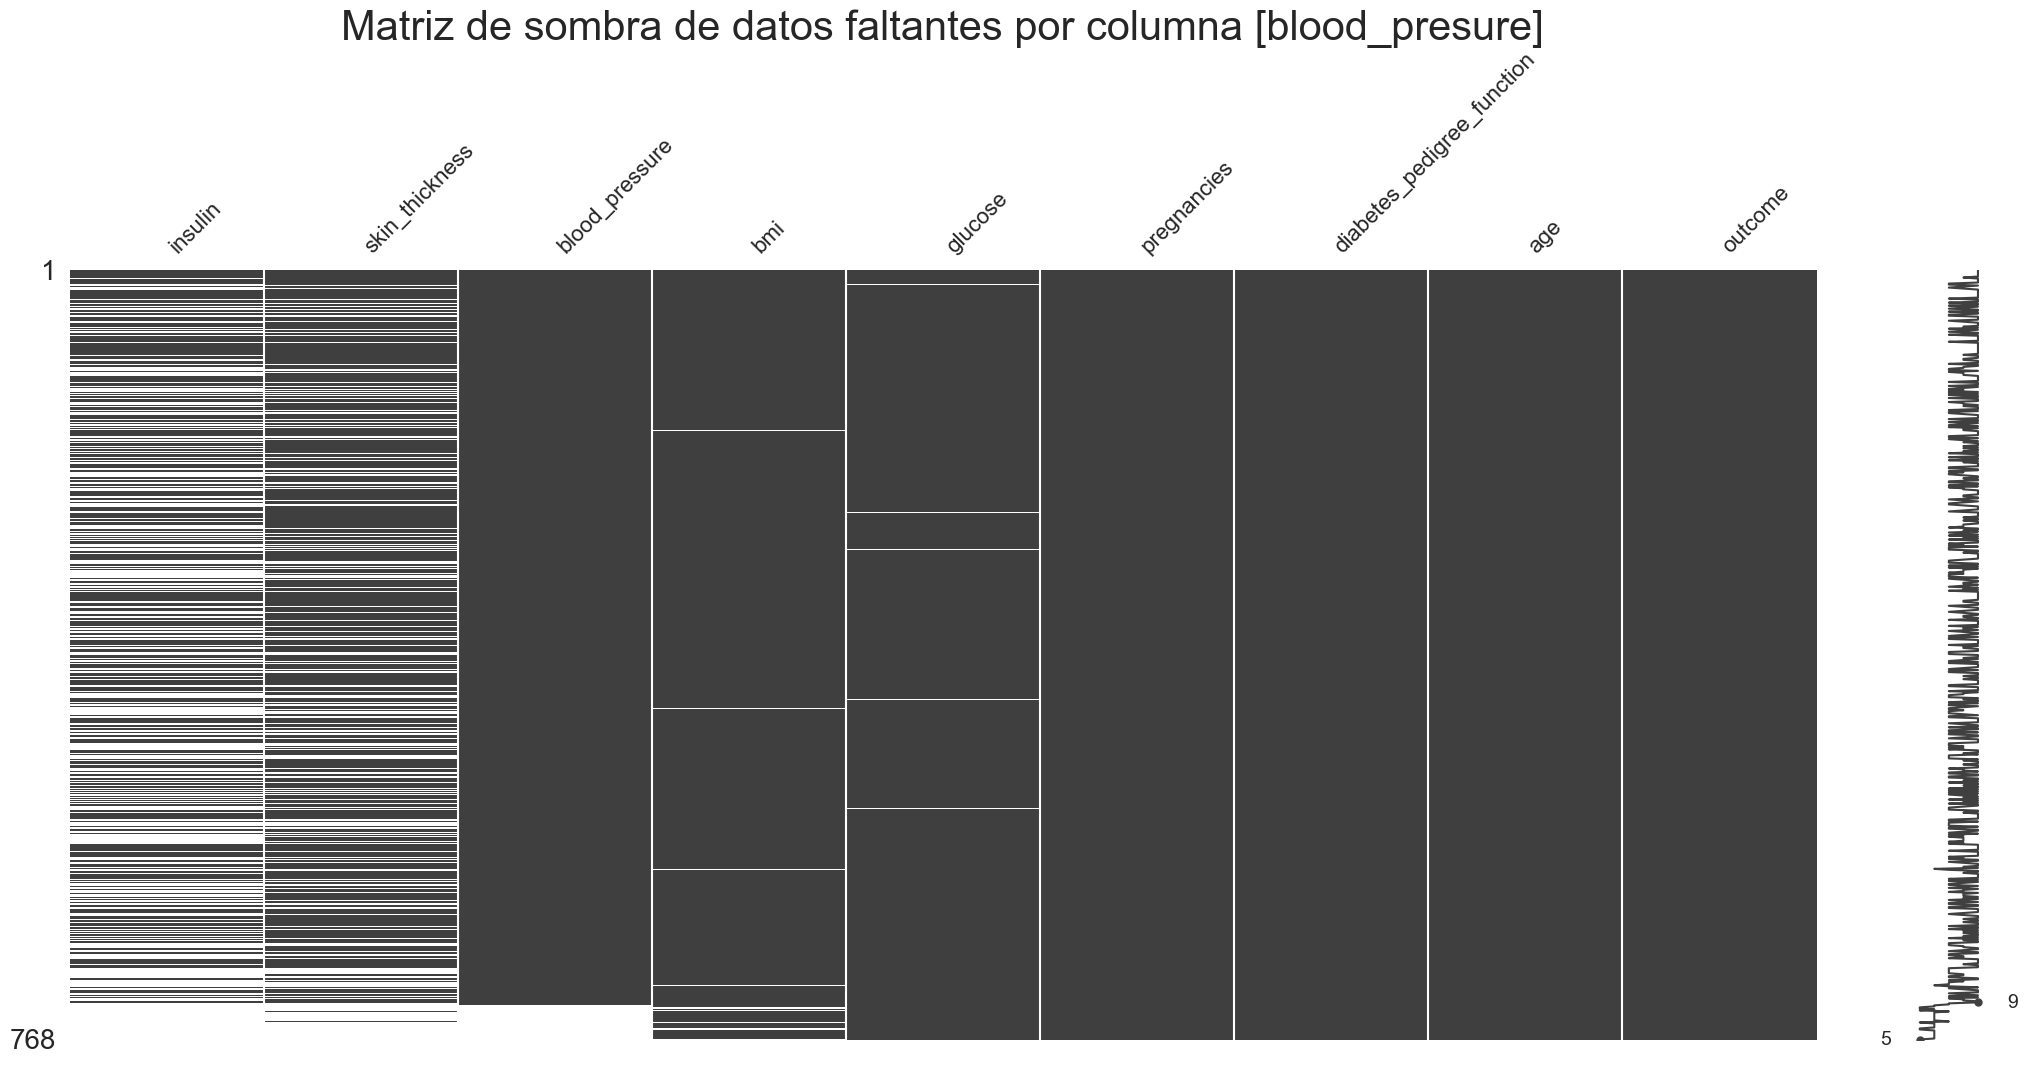

In [1711]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by="blood_pressure")
    # ordena los valores segun una columna
    .pipe(missingno.matrix)
                

)
plt.title("Matriz de sombra de datos faltantes por columna [blood_presure]", fontsize=30);

<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Gráfica: Matriz de sombra de datos faltantes por columna [blood_presure]</em></b>
    <ul>
        <li>Los valores faltantes de la variable blood_presure pueden estar relacionado a algunos valores de la insulina o de la skin_thickness por lo que son de tipo MAR</li>
        <li>Esta conclusión la sacamos a raiz de que la cnantidad de valores faltantes estan en las mismas filas de ambas columnas</li>
    </ul>
</div>

## Missing Not At Random (MNAR)

**Missing Not At Random (MNAR)** es un patrón de datos faltantes en el que la probabilidad de que falte un valor en una variable está relacionada con los propios valores no observados. En otras palabras, la probabilidad de que falte un valor está influenciada por la información no observada en el conjunto de datos.

En un escenario MNAR, la falta de valores no es aleatoria y puede depender de las características o valores no observados en el conjunto de datos. Esto significa que existe una relación sistemática entre la probabilidad de datos faltantes y las variables no observadas.

Por ejemplo, si estamos recopilando datos sobre ingresos y la probabilidad de que falten datos en la variable "ingresos" depende de los propios valores de ingresos no observados, estamos en un escenario MNAR.

En términos generales, en un patrón MNAR, la falta de datos está relacionada con información no observada y puede haber un sesgo sistemático en los datos faltantes. Manejar datos bajo el supuesto de MNAR puede ser más desafiante, ya que la relación entre los valores faltantes y la información no observada debe entenderse y modelarse cuidadosamente.


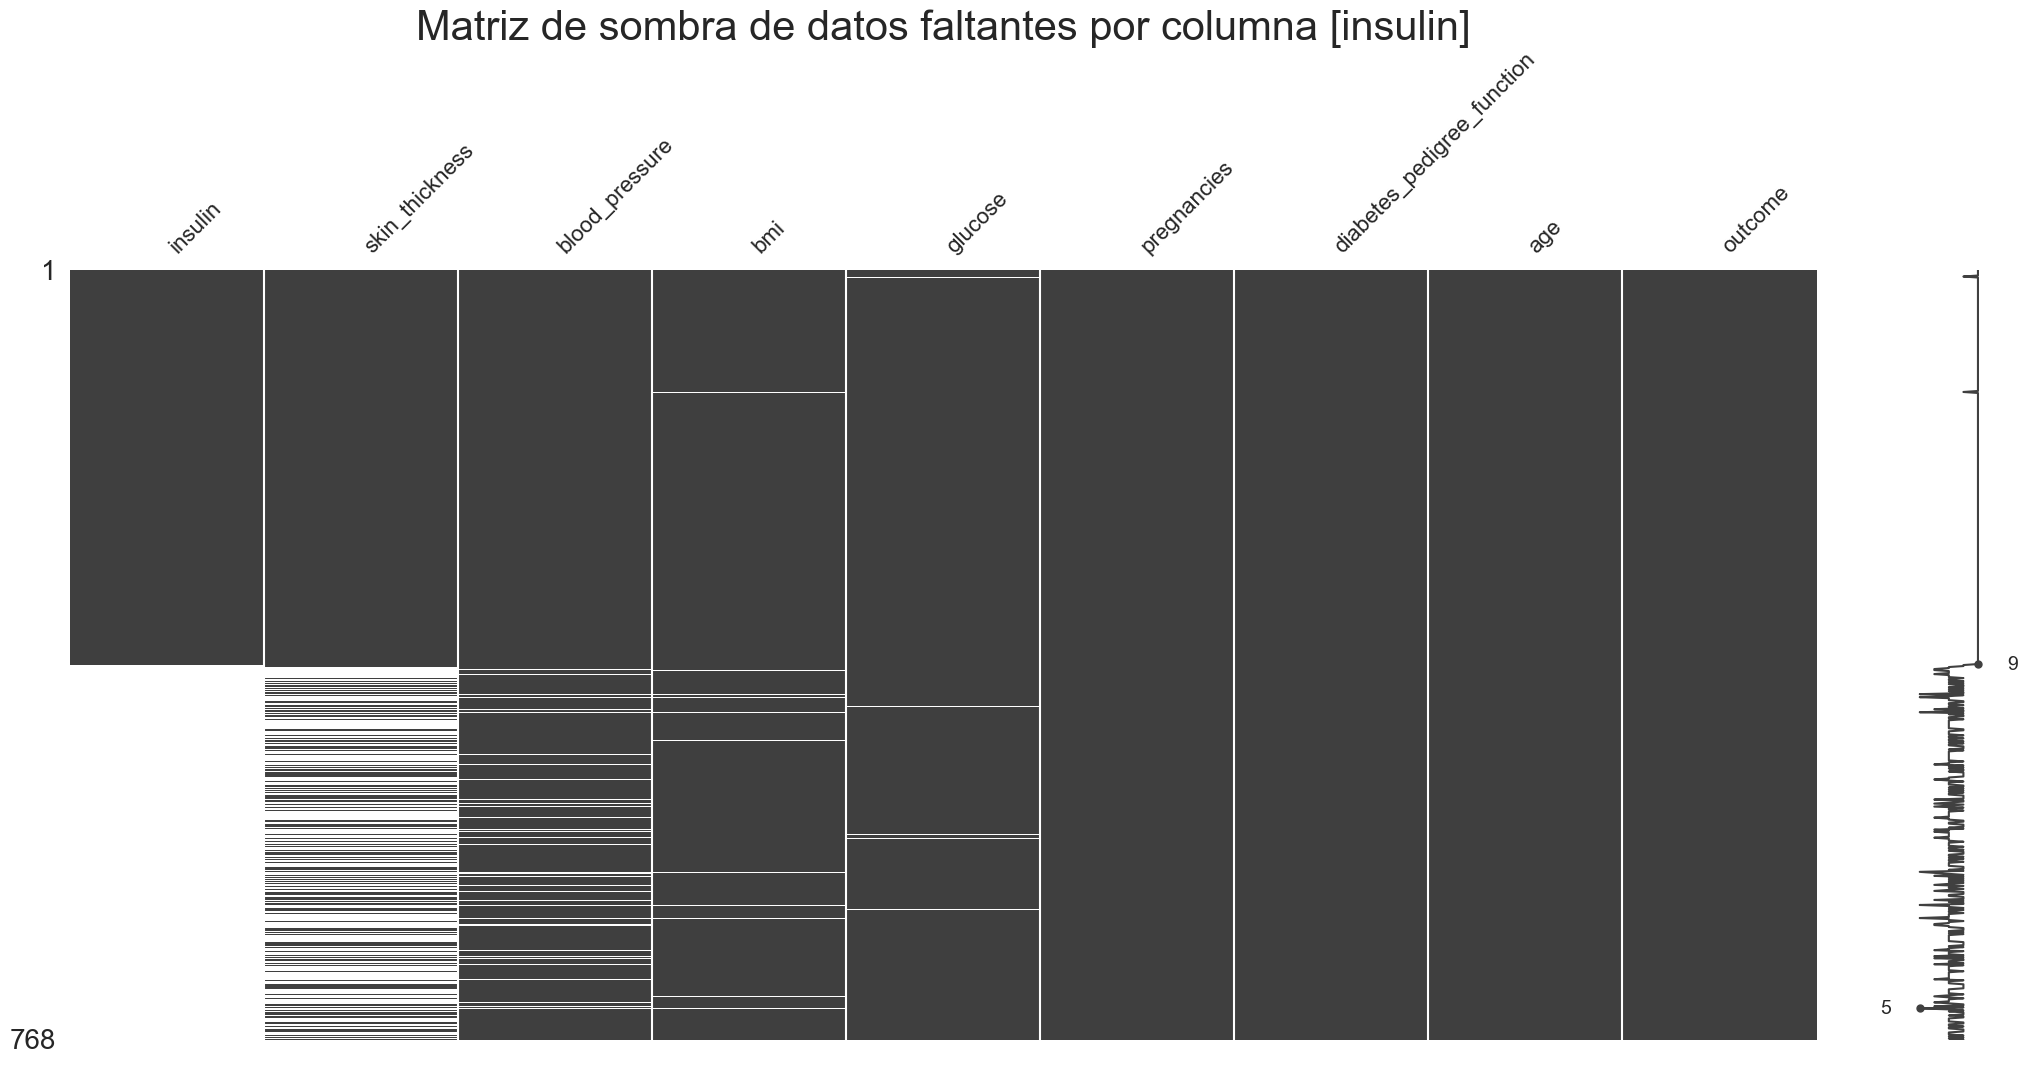

In [1716]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by="insulin")
    .pipe(missingno.matrix)
                

)# al filtrar por insulina se ve que flata otros datos wow
plt.title("Matriz de sombra de datos faltantes por columna [insulin]", fontsize=30);


<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Gráfica: Matriz de sombra de datos faltantes por columna [insulin]</em></b>
    <ul>
        <li>Hay un rango de valores de insulina en la que estan la mayoria de los valores faltantes de las demas variables de lo que podemos concluir que es de tipo MNAR</li>
    </ul>
</div>

# Concepto y Aplicación de la Matriz de Sombras (Shadow Matrix)

La **Matriz de Sombras (Shadow Matrix)** es una herramienta visual utilizada en análisis de datos para representar patrones y relaciones en datos faltantes. También se conoce como "matriz de sombras" porque muestra áreas de la matriz de datos donde faltan valores a través de sombras o tonos más oscuros.
Permiten establecer relaciones entre las variables que tienen todas sus observaciones y la ausencia o presencia de otras variables de forma que se pueda comparar estadisticos o visualizarlos de manera efectiva

### Concepto:

- **Visualización de Datos Faltantes:** La matriz de sombras proporciona una representación gráfica de la presencia o ausencia de datos en un conjunto de datos. Cada celda de la matriz representa una observación (fila) y una variable (columna), y la sombra en una celda indica la ausencia de datos en esa posición.

- **Identificación de Patrones:** Al observar la matriz de sombras, es posible identificar patrones en los datos faltantes. Pueden surgir patrones sistemáticos que revelen relaciones entre la falta de valores en diferentes variables o entre observaciones específicas.

### Aplicación:

- **Exploración de Datos Faltantes:** La matriz de sombras es una herramienta útil durante la fase de exploración de datos para comprender la distribución y estructura de los valores faltantes en un conjunto de datos.

- **Identificación de Patrones MNAR:** En el contexto de datos faltantes, la matriz de sombras puede ayudar a identificar patrones que sugieran la presencia de valores faltantes no aleatorios, como en el caso de Missing Not At Random (MNAR).

- **Soporte en Toma de Decisiones:** La visualización de la matriz de sombras puede ser valiosa para la toma de decisiones en la manipulación de datos faltantes, especialmente al considerar estrategias de imputación o análisis subsiguientes.

En resumen, la matriz de sombras es una herramienta visual efectiva para entender y explorar la distribución de datos faltantes en un conjunto de datos, proporcionando información valiosa sobre posibles patrones y relaciones.


## Construcción de la matriz de sombras

In [1719]:
print("Tabla: Matriz de sombra, columnas con [Not Missign] y [missing]")
# Verificar la presencia de valores faltantes en el DataFrame riskfactors_df
# y crear una matriz de sombras que indica la presencia o ausencia de valores faltantes en cada celda.
(
    riskfactors_df  # DataFrame original
    .isna()  # Crear una matriz booleana donde True indica valores faltantes y False indica valores presentes
    .replace({  # Reemplazar valores booleanos con etiquetas "Not Missing" y "missing"
        False: "Not Missing",
        True: "missing"
    })
    .add_suffix("_NA")  # Agregar sufijo "_NA" a los nombres de las columnas en la matriz de sombras
    .pipe(  # Utilizar la función pipe para realizar operaciones encadenadas
        lambda shadow_matrix: pd.concat(  # Concatenar el DataFrame original con la matriz de sombras
            [riskfactors_df, shadow_matrix],  # Lista de DataFrames a concatenar
            axis="columns"  # Concatenar a lo largo de las columnas
        )
    )
)

Tabla: Matriz de sombra, columnas con [Not Missign] y [missing]


,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,missing,missing,missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,missing,missing,missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,missing,missing,missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,missing,missing,missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,missing,missing,missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


Matriz de Sombra
Permiten establecer relaciones entre las variables que tienen todas sus observaciones y la ausencia o presencia de otras variables de forma que se pueda comparar estadisticos o visualizarlos de manera efectiva

## Utilizar función de la utilería **bind_shadow_matrix()**

In [1685]:
# Con esto hacemos la misma matriz de sombras
# Pero con ayuda de la libreria missin que creamos
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


## Explorar estadisticos utilizando las nuevas columnas de la matriz sombra

In [1733]:
# Nos ayuda a encontrar si existe diferencias de alguna variable referente a la ausencia de otra
print("Tabla: Valores de la columna Embarazo_NA, filtrado por edad ")
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True) #une la matriz de sombra creada
    .groupby(["pregnant_NA"]) # agrupar por la ausencia de la variable peso 
    ["age"] # variable age como referencia
    .describe()
    .reset_index()
)

Tabla: Valores de la columna Embarazo_NA, filtrado por edad 


,pregnant_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,215.0,61.590698,15.430577,9.0,52.0,62.0,71.5,97.0
1,Not Missing,30.0,33.133333,9.212934,7.0,29.5,34.0,40.0,44.0


In [1722]:
print(columns_translation)

{'state': 'estado', 'sex': 'género', 'age': 'edad', 'weight_lbs': 'peso_libras', 'height_inch': 'altura_pulgadas', 'bmi': 'índice_masa_corporal', 'marital': 'estado_civil', 'pregnant': 'embarazada', 'children': 'número_de_hijos', 'education': 'nivel_educativo', 'employment': 'empleo', 'income': 'ingreso', 'veteran': 'veterano', 'hispanic': 'hispano', 'health_general': 'salud_general', 'health_physical': 'salud_física', 'health_mental': 'salud_mental', 'health_poor': 'salud_mala', 'health_cover': 'cobertura_médica', 'provide_care': 'proporcionar_cuidado', 'activity_limited': 'actividad_limitada', 'drink_any': 'consume_alcohol', 'drink_days': 'días_de_consumo_alcohol', 'drink_average': 'promedio_consumo_alcohol', 'smoke_100': 'fumador', 'smoke_days': 'días_fumando', 'smoke_stop': 'dejó_de_fumar', 'smoke_last': 'último_día_fumado', 'diet_fruit': 'dieta_frutas', 'diet_salad': 'dieta_ensaladas', 'diet_potato': 'dieta_papas', 'diet_carrot': 'dieta_zanahorias', 'diet_vegetable': 'dieta_vegeta

<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Tabla:  Valores de la columna embarazo, filtrado por edad </em></b>
    <ul>
        <Preguntando>Preguntando por los valores faltantes de "pregnant" según la edad, podemos ver que donde hay datos la media de edad es de 33 y la edad máxima es de 44 (mujeres en edad reproductiva). Mientras que para los valores faltantes, la media de edad es de 61 y la edad máxima de 97 (mujeres que probablemente no están en edad reproductiva). Por lo tanto, podemos inferir que los valores faltante en "pregnant" están relacionados con la variable "age".</li>
    </ul>
</div>

# visualización de valores faltantes en una variable

La visualizacion de valores faltantes en una variable permite detectar si esta ocurriendo un sesgo en la presencia o ausencia de valores faltantes ocasionado por otra variable



/Users/Sebastian/Desktop/Cursos Platzi/Datos faltantes/env_data/lib/python3.9/site-packages/seaborn/utils.py:159: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout = method([], [], **kws)


<AxesSubplot:xlabel='weight_lbs_NA', ylabel='age'>

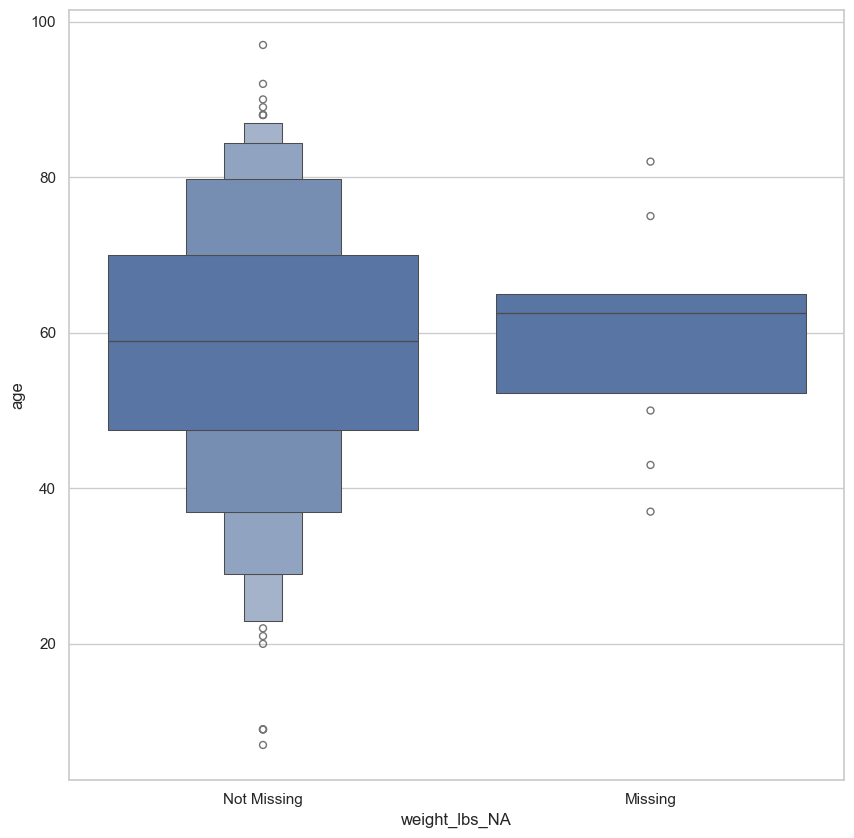

In [1687]:
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df : (
            sns.boxenplot(
                data  =df,
                x = "weight_lbs_NA",
                y = "age"
            )
        )
    )
)

<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">👆🏽 <em>Interpretación de Tabla:  XXX</em></b>
    <ul>
        <Preguntando>Preguntando por los valores faltantes de "pregnant" según la edad, podemos ver que donde hay datos la media de edad es de 33 y la edad máxima es de 44 (mujeres en edad reproductiva). Mientras que para los valores faltantes, la media de edad es de 61 y la edad máxima de 97 (mujeres que probablemente no están en edad reproductiva). Por lo tanto, podemos inferir que los valores faltante en "pregnant" están relacionados con la variable "age".</li>
    </ul>
</div>

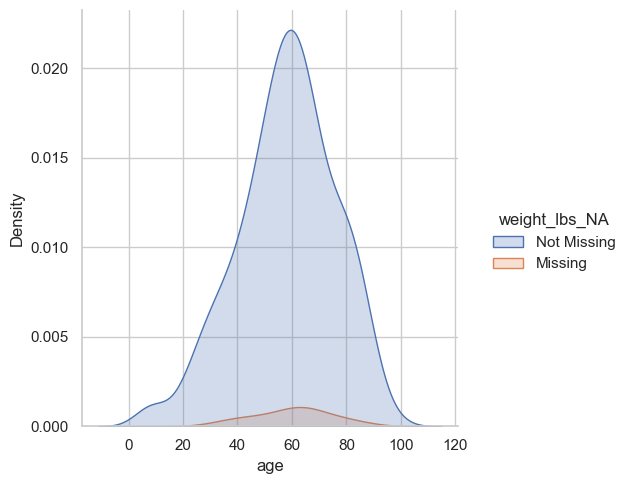

In [1688]:
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df : (
            sns.displot(
                data  =df,
                x = "age",
                hue="weight_lbs_NA",
                kind="kde",
                fill = True
                
            )
        )
    )
);

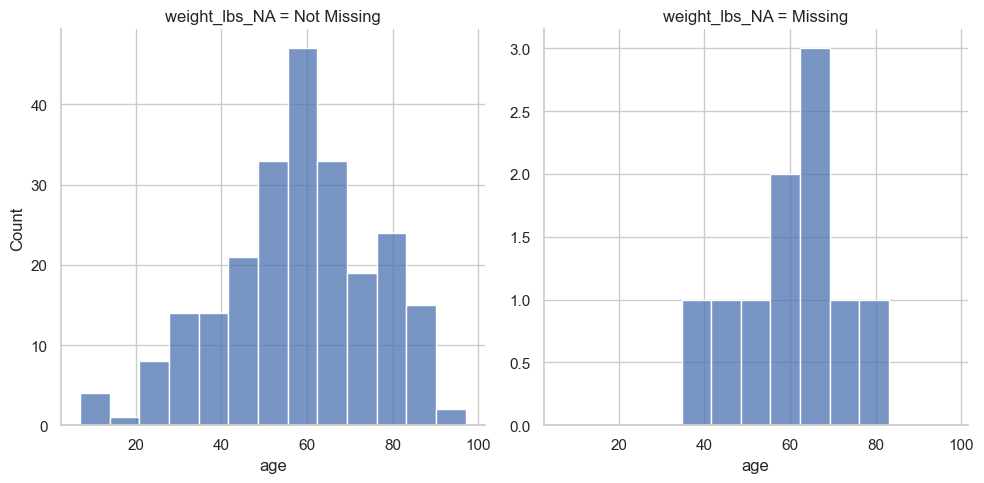

In [1689]:
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df : (
            sns.displot(
                data  =df,
                x = "age",
                col="weight_lbs_NA",
                facet_kws = {
                    "sharey":False # tenga axes diferentes para el eje de las Y, las escalas son diferentes OJO maninto
                },
                fill = True
                
            )
        )
    )
);

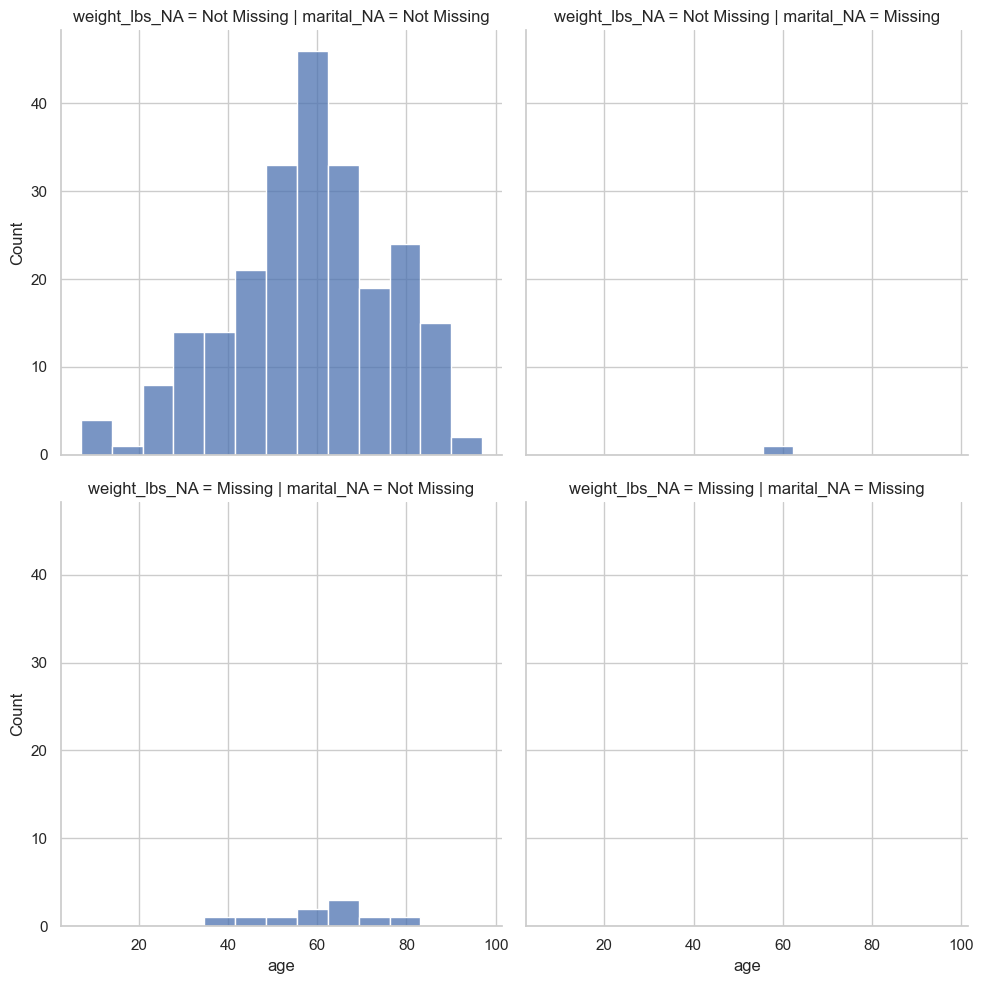

In [1690]:
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df : (
            sns.displot(
                data  =df,
                x = "age",
                col="marital_NA",
                row = "weight_lbs_NA",
                fill = True
                
            )
        )
    )
);

# Visualización de valores faltantes en dos variables


Visualizacion de valores faltantes en dos variables
Permite visualizar y comparar dos variables cuando a ambas le faltan valores. Un grafico muy util para este tipo de comparaciones son los scatterplot



Para este ejemplo, los puntos azules indican que existe valores tanto para la temperatura como para la humedad. Los puntos rojos indican que solo hay valores para una de las variables y no para la otra. Este tipo de grafica nos ayuda a conocer donde estan agrupados los valores faltantes respecto a otras variables y se grafican fuera de la presencia de los puntos reales para que no introduzcan ruido.

Ademas podemos incluir otro tipo de graficos como los boxplot que nos ayudan a compara la distribucion de los datos de las variables con la distribucion de los datos faltantes y a visualizar si se estan acumulando en un espacio del scatterplot

Este tipo de analisis es importante porque al realizar un EDA sobre los datos faltantes queremos saber si estos siguen una relacion, una tendencia, un comportamiento caracteristico que podamos rellenar segun su variabilidad

In [1691]:
# funcion que añade valores aleatorios a las variables con valores faltantes
# para visualizarlos en un eje
def column_fill_with_dummies(
    column: pd.Series,
    proportion_below: float=0.10, #Proporcion de los datos en la grafica 
    jitter: float=0.075,  # evita el asolapamiento de los puntos en la grafica
    seed: int=42, #semilla para la aleatoriedad
) -> pd.Series: # la funcion retorna una serie

    #Copiar las columnas del dataframe
    column = column.copy(deep=True)

    #Extraer los valores de las variables
    missing_mask = column.isna() # matriz de booleanos
    number_missing_values = missing_mask.sum() #conteo de valores faltantes
    column_range = column.max() - column.min() #rango de las variables

    # shift data
    column_shift = column.min() - column.min() * proportion_below

    # crear un poco de ruido alrededor de los puntos 
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

    #Guardar los nuevos datos aleatorios
    column[missing_mask] = column_shift + column_jitter

    return column

# Visualización de datos faltantes para dos variables

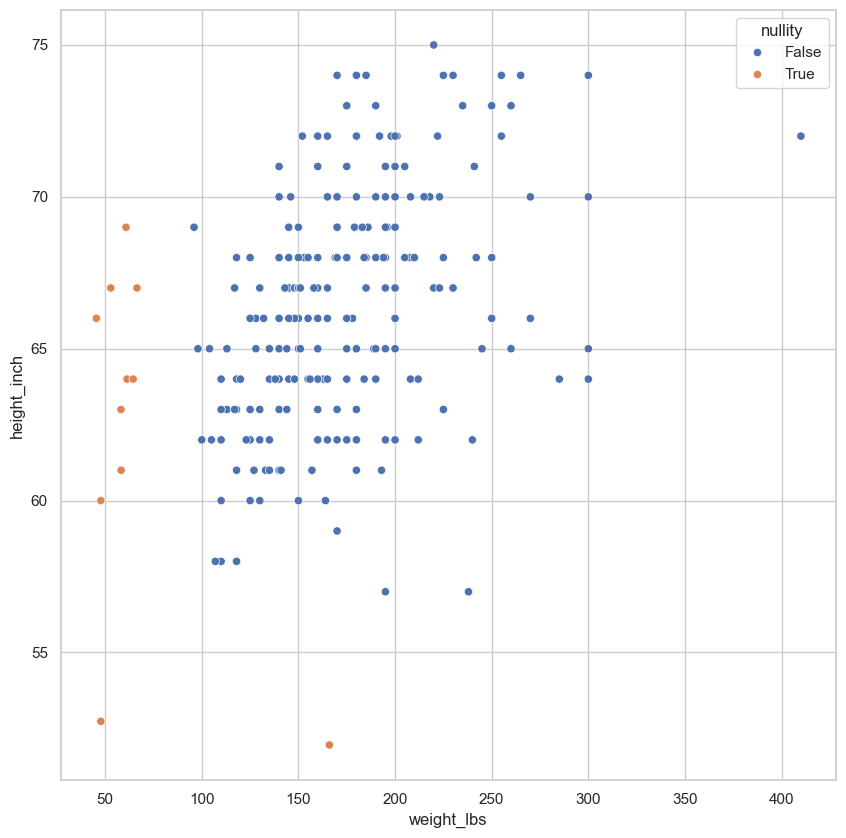

In [1692]:
(
    riskfactors_df.missing.grafica_dos_variables(
                column_1 = "weight_lbs",
                column_2 = "height_inch",
                )
)


# Correlación de nulidad 

Correlacion de Nulidad
Existen valores faltantes que aparecen conjuntamente con otras variables en el conjunto de datos? . La correlacion de nulidad nos ayuda a encontrar relaciones entre las variables en funcion de su nulidad

/Users/Sebastian/Desktop/Cursos Platzi/Datos faltantes/env_data/lib/python3.9/site-packages/seaborn/matrix.py:306: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
/Users/Sebastian/Desktop/Cursos Platzi/Datos faltantes/env_data/lib/python3.9/site-packages/seaborn/matrix.py:316: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


<AxesSubplot:>

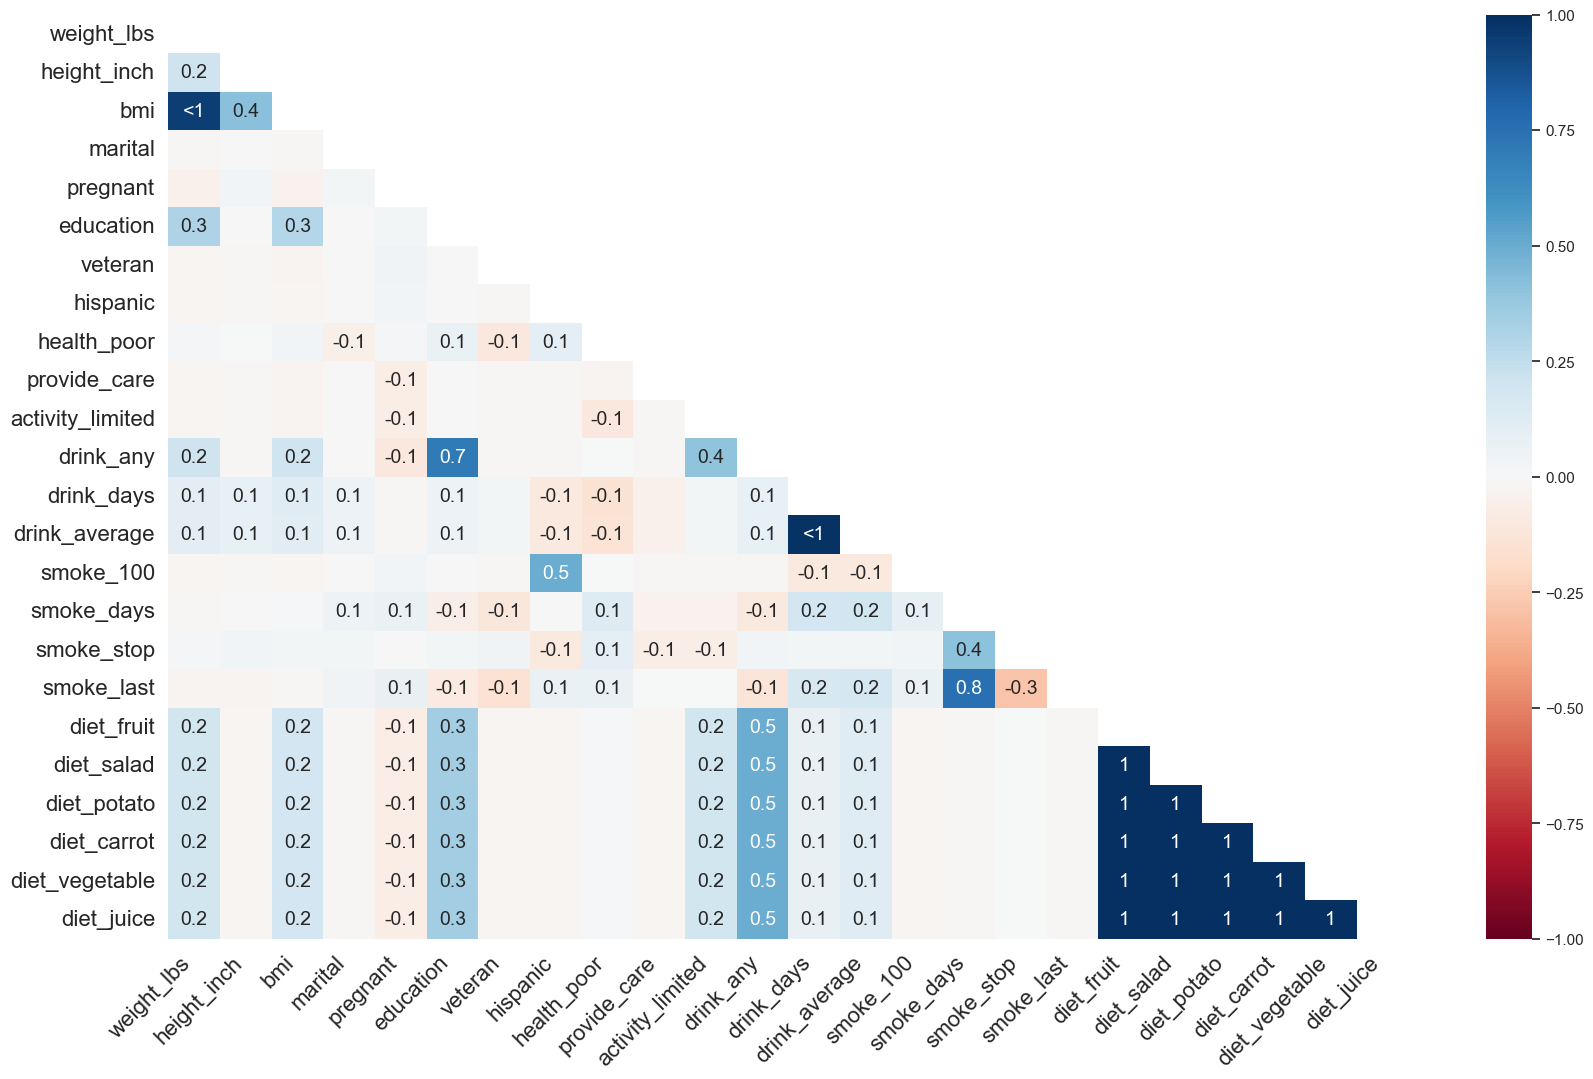

In [1693]:
missingno.heatmap(
    df = riskfactors_df
)

Los valores coloreados de color gris representan que no hay una correlacion ni positiva ni negativa entre las valores faltantes de las variables

Los valores coloreados de azul indican una correlacion positiva, es decir, la presencia de un valor faltante en una de las variables esta correlacionado con un valor faltante en la otra como es el caso de las variables dieta

Los valores coloreados de rojo simboliza una correlacion negativa, es decir, mientras en una de las variables hay un valor faltante en la otro se tiene un valor completo y vicerversa como en el caso de las variables smoke_last y smoke_stop

Hay caso donde te puedes encontrar un simbolo de <1 lo que indica que estas cerca del 100% de correlacion bien sea negativa o positiva dependiendo del color

<AxesSubplot:>

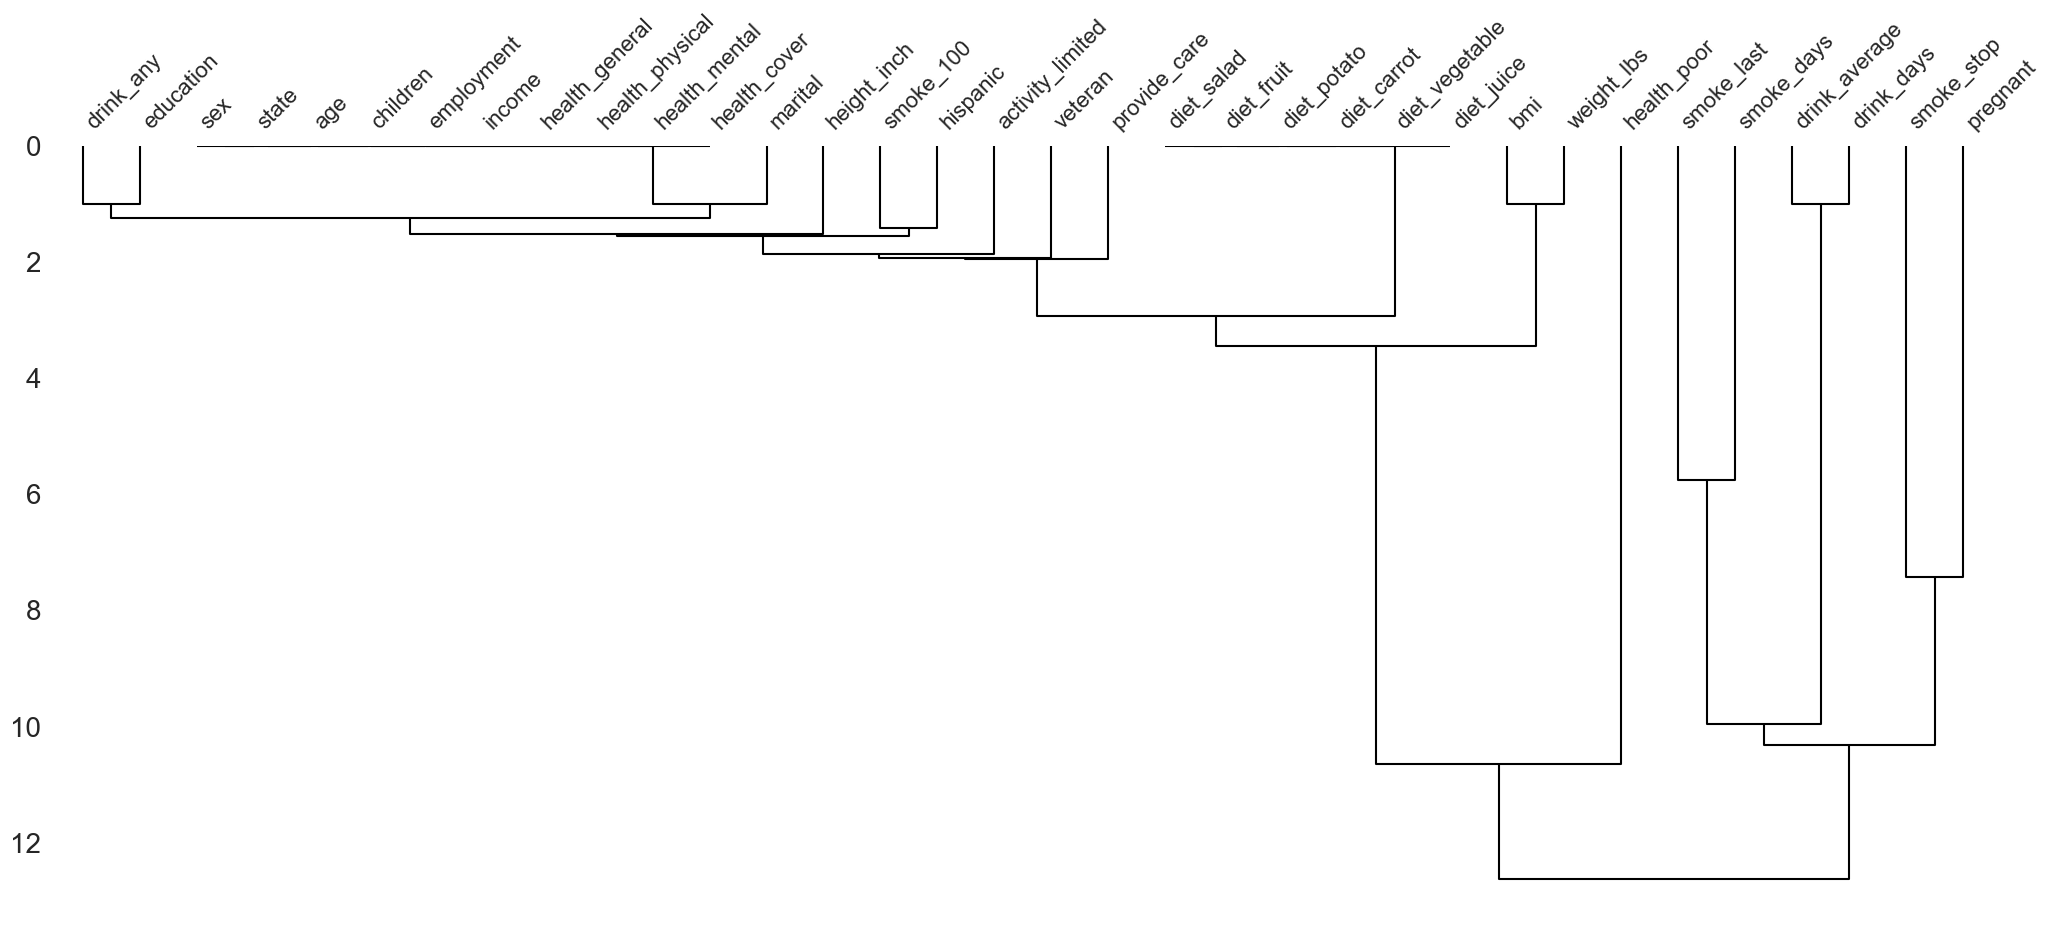

In [1694]:
missingno.dendrogram(
    df=riskfactors_df   
)

Dendograma de la variable riskfactors. Se trata de un clustering jerarquica que agrupa las variables con correlaciones muy altas

Las variables que estan agrupadas cerca del nivel base indican que la presencia de valores faltantes estan muy relacionadas entre si

Mientras mas separado esten las variables en el diagrama es menos probable que los valores faltantes esten correlacionados entre las columnas

# Eliminar valores faltantes

In [1695]:
Eliminacion de Valores Faltantes
Cuando se trata de valores faltantes tenemos dos aproximaciones para el tratamiento de los mismos:

Eliminacion de valores faltantes: La eliminación de valores faltantes asume que los valores faltantes están perdidos completamente al azar (MCAR). En cualquier otro caso, realizar una eliminación de valores faltantes podrá ocasionar sesgos en los análisis y modelos subsecuentes. Por tanto, es importante investigar que mecanismos tienen los datos para asi evitar los sesgos a la hora de eliminarlos
Imputacion de valores faltantes: consiste en añadir valores en los datos faltantes para mantener el registro en el dataset

SyntaxError: invalid syntax (59693925.py, line 1)

**Primero revisa el níumero total de observaciones y variables que tiene tu conjunto de datos**

In [ ]:
riskfactors_df.shape

(245, 34)

## pairwise delection (eliminacion por pares)

In [ ]:
(
    riskfactors_df
    .weight_lbs
    .mean()
# ignora los valores faltantes
)


174.26808510638298

In [ ]:
riskfactors_df.weight_lbs.size, riskfactors_df.weight_lbs.mean(skipna=False)

(245, nan)

In [ ]:
riskfactors_df.weight_lbs.mean(skipna=False)

nan

## Listwise deletion or complete case (Eliminacion por lista o caso completo)

### Con base en 1 columna

In [ ]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs"], # toda la fila se elimina en cada dato faltante en esta columna
        how = "any" # Tipo de algoritmo a usar

    )
    .shape

)

(235, 34)

### Con base en 2 o mas columnas

In [ ]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"], # toda la fila se elimina en cada dato faltante en esta columna
        how = "any" # Tipo de algoritmo a usar

    )
    .shape

)

(234, 34)

In [ ]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"],  
        how = "all" # Tipo de algoritmo a usar

    )
    .shape

)

(244, 34)

<AxesSubplot:>

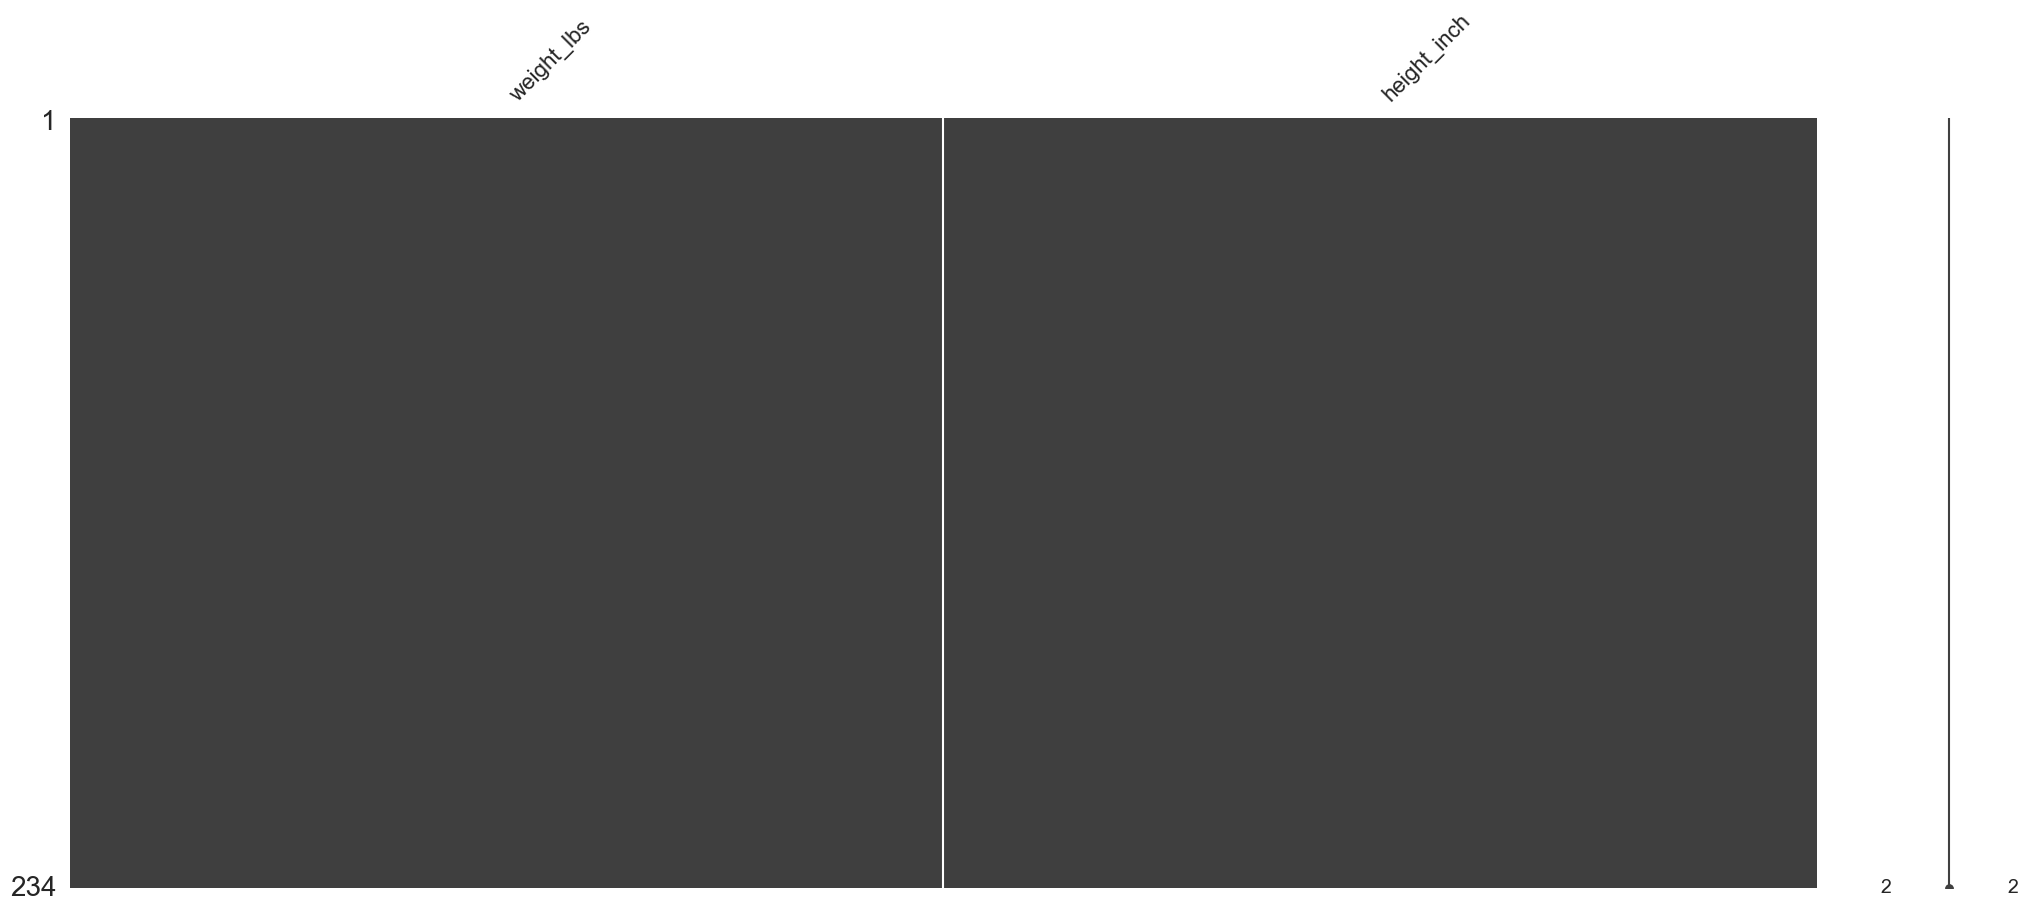

In [ ]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"],  
        how = "any" # Tipo de algoritmo a usar

    )
    .select_columns(["weight_lbs", "height_inch"])
    .pipe(missingno.matrix)

)

<AxesSubplot:>

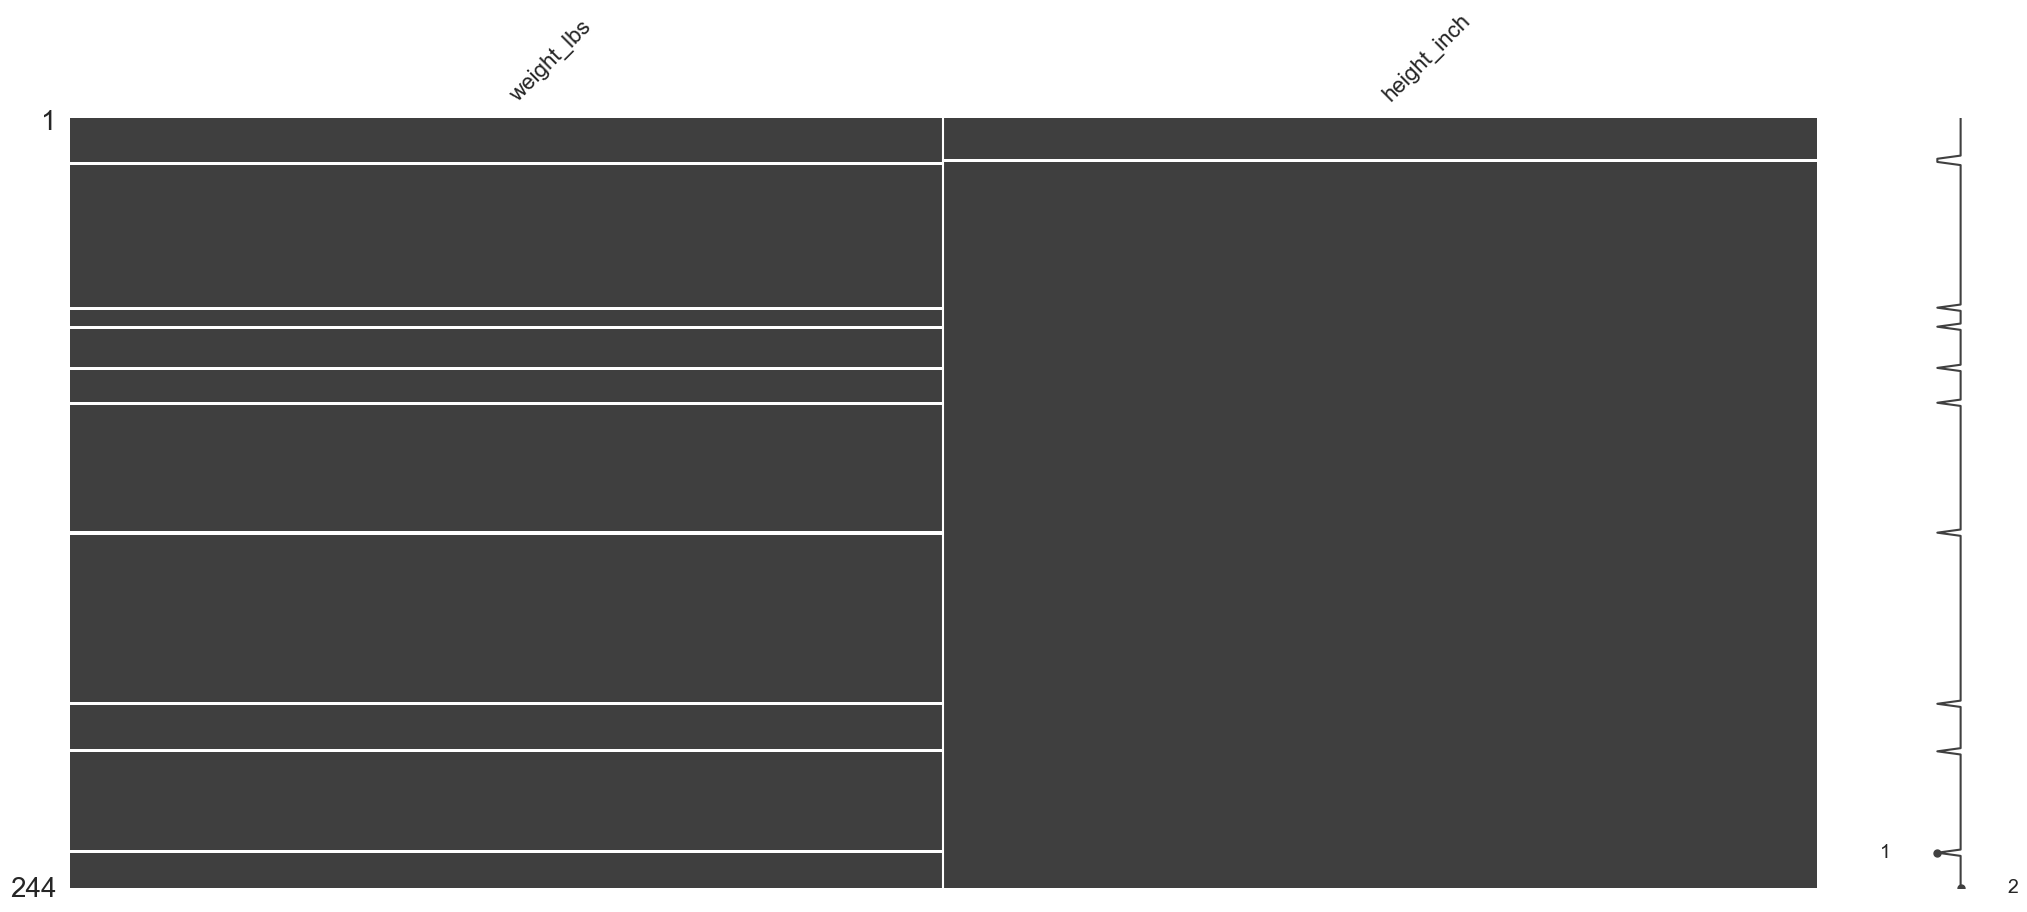

In [ ]:
(
    riskfactors_df
    .dropna(
        subset=["height_inch" ,"weight_lbs" ],  
        how = "all" # Tipo de algoritmo a usar

    )
    .select_columns(["weight_lbs", "height_inch"])
    .pipe(missingno.matrix)

)

## imputacion basica de datos

mputacion con base en el contexto
Implica conocer la estructura de los datos por lo que podemos completar las entradas vacias. Para este ejemplo, tenemos un conjunto de datos:

In [ ]:
implicit_to_explicit_df = pd.DataFrame(
    data={
        "name": ["lynn", np.nan, "zelda", np.nan, "shadowsong", np.nan],
        "time": ["morning", "afternoon", "morning", "afternoon", "morning", "afternoon",],
        "value": [350, 310, 320, 350, 310, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350
1,NaN,afternoon,310
2,zelda,morning,320
3,NaN,afternoon,350
4,shadowsong,morning,310
5,NaN,afternoon,320


Claramente vemos que los valores de name podemos rellenarlos debido a que el contexto nos indica que son los nombres de la celda de arriba




In [ ]:
implicit_to_explicit_df.ffill() #Rellena los nan con los valores de la celda de arriba

,name,time,value
0,lynn,morning,350
1,lynn,afternoon,310
2,zelda,morning,320
3,zelda,afternoon,350
4,shadowsong,morning,310
5,shadowsong,afternoon,320


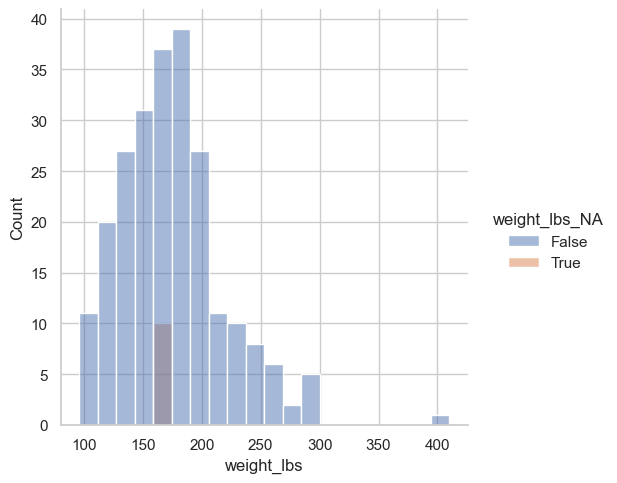

In [ ]:
(
    riskfactors_df
    .select_columns("weight_lbs","height_inch","bmi")
    .missing.bind_shadow_matrix(true_string=True,false_string=False)
    .apply(
        axis = "rows",
        func = lambda column : column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .pipe(
        lambda df: (
            sns.displot(
                data = df,
                x = "weight_lbs",
                hue= "weight_lbs_NA"

            )
        )
    )
)

<AxesSubplot:xlabel='weight_lbs', ylabel='height_inch'>

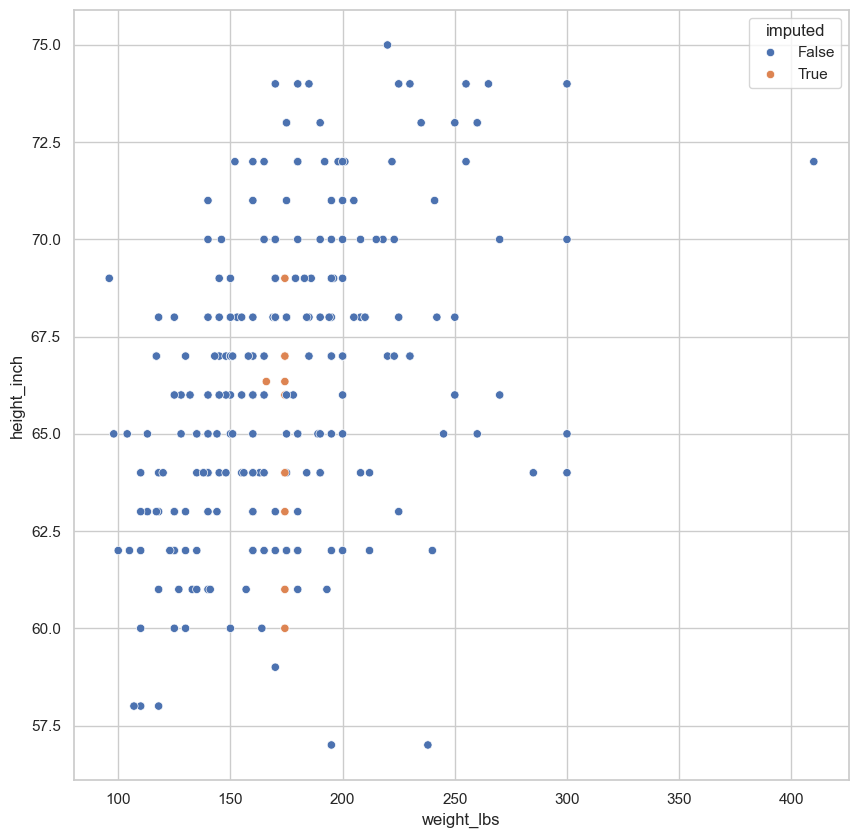

In [ ]:
(
    riskfactors_df
    .select_columns("weight_lbs","height_inch","bmi")
    .missing.bind_shadow_matrix(true_string=True,false_string=False)
    .apply(
        axis = "rows",
        func = lambda column : column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .assign(
        imputed = lambda df : df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe (
        lambda df : (
            sns.scatterplot(
                data = df,
                x= "weight_lbs",
                y= "height_inch",
                hue="imputed"
            )
        )
    )
)

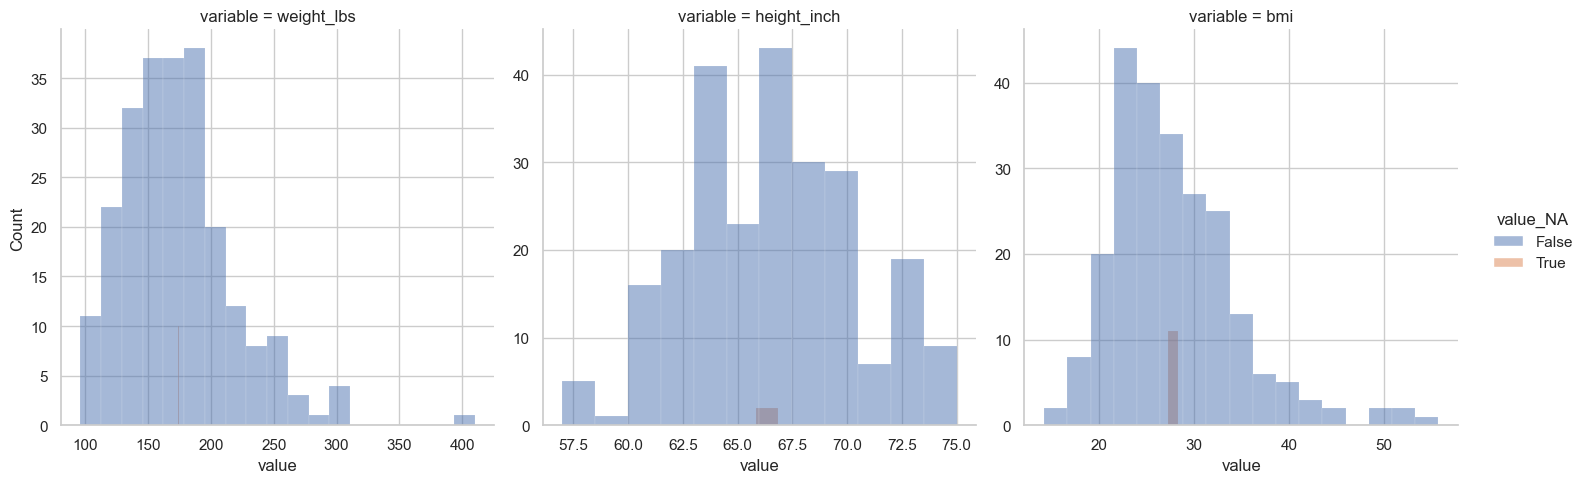

In [ ]:
(
    riskfactors_df
    .select_columns("weight_lbs","height_inch","bmi")
    .missing.bind_shadow_matrix(true_string=True,false_string=False)
    .apply(
        axis = "rows",
        func = lambda column : column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .assign(
        imputed = lambda df : df.weight_lbs_NA | df.height_inch_NA
    )
    .pivot_longer(
        index = "*_NA"
    )
    .pivot_longer(
        index = ["variable", "value"],
        names_to = "variable_NA",
        values_to = "value_NA"
    )
    .assign(
        valid = lambda df: df.apply(axis="columns", func = lambda column : column.variable in column.variable_NA)
    )
    .query("valid")
    .pipe(
        lambda df:(
            sns.displot(
            data = df,
            x = "value",
            hue = "value_NA",
            col = "variable",
            common_bins = False,
            facet_kws = ({
                "sharex" : False,
                "sharey": False
                }
            )            
            )


        )
    )

)

# Examples markdown


<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">🔍 Summary</b>
    <p>
        Después de analizar los datos y realizar diversas exploraciones, llegamos a las siguientes conclusiones:
        <ul>
            <li>Es crucial identificar los valores faltantes, dependiendo de la biblioteca que estés utilizando.</li>
            <li>En Numpy, los valores faltantes se representan como 'nan' y se comportan como valores numéricos (tipo float). Al compararlos con 'None', se obtiene False, indicando que no son el mismo objeto. Sin embargo, al usar la función 'is', se obtiene True, lo que significa que un 'nan' está contenido en otro 'nan'. Se debe tener precaución al manejar estos casos.</li>
        </ul>
    </p>
</div>

<div class="alert alert-info" role="alert">
    <b style="font-size: 1.5em;">ℹ️ Información</b>
    <p>
        Este es un mensaje informativo.
    </p>
</div>

<div class="alert alert-success" role="alert">
    <b style="font-size: 1.5em;">✅ Éxito</b>
    <p>
        ¡La operación se completó con éxito!
    </p>
</div>